In [1]:
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import requests
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from sklearn import metrics

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.colors import ListedColormap
import scipy as sc


plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

C:\Users\Samar\AppData\Local\Temp\ipykernel_19528\638414390.py:36: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Produire une url à partir de la position et de la localisation

def get_url(position,location,number):
    template="https://fr.indeed.com/jobs?q={}&l={}&start={}"
    url=template.format(position,location,number)
    return url

In [3]:
# exécuter le web scrapping (fr.indeed.com)

def get_record(job_card):
    title=job_card.find_element(By.XPATH,'.//h2[contains(@class,"jobTitle")]').text.strip('new').strip()
    try:
        company=job_card.find_element(By.XPATH,'.//span[@class="companyName"]').text
    except:
        company='None'
    try:
        location = job_card.find_element(By.XPATH,'.//div[contains(@class,"companyLocation")]').text
    except AttributeError:
        company='None'
    try:
        salary= job_card.find_element(By.XPATH,'.//div[contains(@class,"salary-snippet-container")]').text
    except:
        salary = 'Negotiable'
    try:
        contract= job_card.find_element(By.XPATH,'//*[@id="mosaic-provider-jobcards"]/ul/li[1]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[3]/div[1]/div').text
    except:
        contract = 'None'
    try:
        description = job_card.find_element(By.TAG_NAME,'li').text
    except AttributeError:
        description='None'    
    record=(title,company,location,contract,salary,description)
    return record

In [4]:
# Le main exécutant la fonction du web scrapping
def main_scraper(position, location, pages):
    records = []
   
    number = 0
    for page in range(0,pages):
        url = get_url(position, location, number)
        print('scraping page n°'+str(page+1))
        number += 10
        
        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        driver.get(url)
        job_cards=driver.find_elements(By.XPATH,'//div[contains(@class,"job_seen_beacon")]')
        driver.implicitly_wait(3) 

        # record the data:
        for job_card in job_cards:
            record=get_record(job_card)
            records.append(record)

        # save the recorded data:
    with open(position+'.csv','w',newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Title','Company','Location','Contract','Salary','Description'])
        writer.writerows(records)

In [381]:
# donner la position et la localisation à chercher
position1='développeur'
position2= 'data+scientist'
location = 'France'

In [378]:
# donner la position et la localisation à chercher
position3= 'devops'

In [ ]:
main_scraper(position1, location, 40 )

In [374]:
main_scraper(position2, location, 40 )

scraping page n°1


[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:06<00:00, 1.02MB/s]


scraping page n°2
scraping page n°3
scraping page n°4
scraping page n°5
scraping page n°6
scraping page n°7
scraping page n°8
scraping page n°9
scraping page n°10
scraping page n°11
scraping page n°12
scraping page n°13
scraping page n°14
scraping page n°15
scraping page n°16
scraping page n°17
scraping page n°18
scraping page n°19
scraping page n°20
scraping page n°21
scraping page n°22
scraping page n°23
scraping page n°24
scraping page n°25
scraping page n°26
scraping page n°27
scraping page n°28
scraping page n°29
scraping page n°30
scraping page n°31
scraping page n°32
scraping page n°33
scraping page n°34
scraping page n°35
scraping page n°36
scraping page n°37
scraping page n°38
scraping page n°39
scraping page n°40


In [379]:
main_scraper(position3, location, 10 )

scraping page n°1
scraping page n°2
scraping page n°3
scraping page n°4
scraping page n°5
scraping page n°6
scraping page n°7
scraping page n°8
scraping page n°9
scraping page n°10


In [382]:
ds1 = pd.read_csv(position1+'.csv')
ds2 = pd.read_csv(position2+'.csv')
ds3 = pd.read_csv(position3+'.csv')

In [384]:
ds1

,Title,Company,Location,Contract,Salary,Description
0,Développeur junior H/F,EBP Informatique,Télétravail à 78125 Gazeran,De 28 000 € à 31 000 € par an,De 28 000 € à 31 000 € par an,Travailler en étroite collaboration avec la qualité fonctionnelle et les développeurs logiciels pour enrichir la couverture des tests automatisés.
1,Pour Tiime : Développeur(se) Frontend Angular/Typescript - Full remote - H/F,JL Recrutement,Télétravail à Paris (75),De 28 000 € à 31 000 € par an,50 000 € par an,"Développeur Frontend, Frontend Developer / CDI / Environ 50k€ / 3 - 6 ans / Paris."
2,DÉVELOPPEUR FULLSTACK JAVA/ANGULAR (H/F),Apside,Nantes (44)\n+ 1 lieu,De 28 000 € à 31 000 € par an,De 40 000 € à 60 000 € par an,Développement des évolutions de l’application.
3,Développeur / Développeuse d'application (H/F),Pôle Emploi,33063 Bordeaux\n+ 1 lieu,De 28 000 € à 31 000 € par an,De 1 750 € à 2 000 € par mois,"Vous travaillerez au sein d'une équipe dont l'objectif est double, former de futurs développeurs NoCode et développer des applis métiers à l'attention des…"
4,Développeur Windev / Freelanc,Intuition IT Solutions Ltd.,Nantes (44),De 28 000 € à 31 000 € par an,De 400 € à 550 € par jour,Expert Windev Equipe de 8 à 10 développeurs basés sur Nantes.
...,...,...,...,...,...,...
595,Développeur C++ (H/F),CITECH,Paris (75),CDI,De 45 000 € à 60 000 € par an, Réalisation du développement avec mise en gestion de conf du code source.
596,Développeur Javascript/Java,GEOCONCEPT,Paris (75),CDI,Negotiable,Nous recherchons un Développeur Javascript/Java pour renforcer une des équipes R&D de Nomadia s’occupant du développement des produits orientés logistique.
597,Développeur Angular - Simulateur (H/F),SII Technologies GmbH HR-Service,Bordeaux (33),CDI,Negotiable,Rejoindre une équipe Agile de 10 développeur/euses et contribuer au développement en langage Angular de logiciels de simulation.
598,Developpeur Prestashop / PHP (H/F),pasteque.io,45000 Orléans,CDI,De 35 000 € à 45 000 € par an,"Pour ces projets tu seras amené à réaliser des développements spécifiques, de modules et des travaux sur le parc de clients en maintenance applicative sur l…"


In [385]:
ds2

,Title,Company,Location,Contract,Salary,Description
0,Chemistry Data Scientist,Qubit Pharmaceuticals,75014 Paris 14e,None,Negotiable,Translate business requests into data analysis.
1,Data scientist-(H/F),Société Générale,Télétravail hybride à La Défense (92),None,Negotiable,Rejoignez l’entité Global Banking & Investors Services et plus particulièrement le service en charge de la mesure et de la coordination de l’expérience Clients…
2,Data Scientist – Consultant – Financial Services (H/F),Deloitte,La Défense (92),None,Negotiable,Exploration des données à l’aide d’outils de Data Discovery (Qliksense) et restitution des analyses réalisées ;
3,Data Scientist F/H NORD - LILLE (IT),OTTEO,Lille (59),None,De 40 000 € à 45 000 € par an,Vous accompagnerez notre client nordiste dans le secteur du Retail.
4,Junior Data Scientist,Systemathics,La Défense (92),None,Negotiable,Understand challenges of market data sourcing and processing.
...,...,...,...,...,...,...
595,Data Quality & Process Analyst (F/H) - Hotel Le Royal Lyon MGallery collectio,Accor,Lyon (69),None,Negotiable,Assister les utilisateurs et assurer des formations au besoin.
596,Product Owner outils de Data Science - F/H,BPCE SA,Paris (75),None,Negotiable,"Les expertises de ses équipes sont mises au service du groupe, de ses entreprises et de leurs clients."
597,Ingenieur d'etudes en statistiques - Data analyst (H/F),Adalid,Lille (59),None,Negotiable,Ingenieur statistiques - Data analyst (H/F).
598,DATA ANALYST H/F (IT),DATAQUANTIC,Montrouge (92),None,Negotiable,Migrer sous DATAIKU des modules ETL développés avec ALTERYX (portage technologique intégral).


In [386]:
ds3

,Title,Company,Location,Contract,Salary,Description
0,DevOps junior,Sept Lieues,+ 1 lieu\nTélétravail,De 50 000 € à 65 000 € par an,De 50 000 € à 65 000 € par an,"En tant qu’Ingénieur DevOps, vous rejoindrez le lead DevOps pour travailler en collaboration avec lui."
1,DevOps CI/CD (H/F) - 44 + Remote (IT) / Freelanc,Mindquest (anciennement Club Freelance),Télétravail à Nantes (44),De 50 000 € à 65 000 € par an,Negotiable,Nantes Mindquest (anciennement Club Freelance) Indépendant Informatique IT.
2,DevOps & Cloud Engineer H/F,Les Nouvelles Recrues,75004 Paris 4e,De 50 000 € à 65 000 € par an,De 55 000 € à 65 000 € par an,Une équipe de 6 développeurs back-end ou full-stack.
3,DevOps,B-Hive Engineering,Bordeaux (33),De 50 000 € à 65 000 € par an,Negotiable,Apporter une expertise aux équipes techniques.
4,Ingénieur DevOPS IAC Junior H/F,Air France-KLM,Valbonne (06)\n+ 1 lieu,De 50 000 € à 65 000 € par an,Negotiable,Assurer du consulting et du support aux différentes entités de l’organisation AF/KLM en terme d’automatisation et d’Infrastructure As a Code.
...,...,...,...,...,...,...
145,DEVOPS & Outils : Découplage de librairies et performance F/H,Esker,Lyon (69),De 40 000 € à 45 000 € par an,Negotiable,"Esker développe un produit modulaire, Esker On Demand, construit et déployé régulièrement en production."
146,Ingénieur∙e DevOps - Nantes H/F,Credit Agricole,Nantes (44),De 40 000 € à 45 000 € par an,Negotiable,NaN
147,Ingénieur DevOps H/F,SYD,92700 Colombes,De 40 000 € à 45 000 € par an,Negotiable,"Le conseil (Accompagnement de projet, Infrastructure Management)."
148,"Administrateur systèmes, réseaux et sécurité",HR-TEAM,Lille (59),De 40 000 € à 45 000 € par an,De 40 000 € à 45 000 € par an,Etes garant des composants techniques de votre périmètre et en vous en assurez la cohérence et la sécurité des environnements.


In [387]:
ds = pd.concat([ds1, ds2, ds3], axis=0)

In [388]:
ds

,Title,Company,Location,Contract,Salary,Description
0,Développeur junior H/F,EBP Informatique,Télétravail à 78125 Gazeran,De 28 000 € à 31 000 € par an,De 28 000 € à 31 000 € par an,Travailler en étroite collaboration avec la qualité fonctionnelle et les développeurs logiciels pour enrichir la couverture des tests automatisés.
1,Pour Tiime : Développeur(se) Frontend Angular/Typescript - Full remote - H/F,JL Recrutement,Télétravail à Paris (75),De 28 000 € à 31 000 € par an,50 000 € par an,"Développeur Frontend, Frontend Developer / CDI / Environ 50k€ / 3 - 6 ans / Paris."
2,DÉVELOPPEUR FULLSTACK JAVA/ANGULAR (H/F),Apside,Nantes (44)\n+ 1 lieu,De 28 000 € à 31 000 € par an,De 40 000 € à 60 000 € par an,Développement des évolutions de l’application.
3,Développeur / Développeuse d'application (H/F),Pôle Emploi,33063 Bordeaux\n+ 1 lieu,De 28 000 € à 31 000 € par an,De 1 750 € à 2 000 € par mois,"Vous travaillerez au sein d'une équipe dont l'objectif est double, former de futurs développeurs NoCode et développer des applis métiers à l'attention des…"
4,Développeur Windev / Freelanc,Intuition IT Solutions Ltd.,Nantes (44),De 28 000 € à 31 000 € par an,De 400 € à 550 € par jour,Expert Windev Equipe de 8 à 10 développeurs basés sur Nantes.
...,...,...,...,...,...,...
145,DEVOPS & Outils : Découplage de librairies et performance F/H,Esker,Lyon (69),De 40 000 € à 45 000 € par an,Negotiable,"Esker développe un produit modulaire, Esker On Demand, construit et déployé régulièrement en production."
146,Ingénieur∙e DevOps - Nantes H/F,Credit Agricole,Nantes (44),De 40 000 € à 45 000 € par an,Negotiable,NaN
147,Ingénieur DevOps H/F,SYD,92700 Colombes,De 40 000 € à 45 000 € par an,Negotiable,"Le conseil (Accompagnement de projet, Infrastructure Management)."
148,"Administrateur systèmes, réseaux et sécurité",HR-TEAM,Lille (59),De 40 000 € à 45 000 € par an,De 40 000 € à 45 000 € par an,Etes garant des composants techniques de votre périmètre et en vous en assurez la cohérence et la sécurité des environnements.


In [389]:
# Visualiser la colonne Title
ds.Title.value_counts()

Data Analyst                                      19
Data Analyst H/F                                  18
Data Scientist H/F                                16
Data Analyst (H/F)                                16
Data Scientist                                    12
                                                  ..
Développeur informatique en reconversion (H/F)    1 
Un développeur JavaFX sur Paris / Freelanc        1 
Développeur PLSQL / ORACLE (H/F)                  1 
Développeur C#/.Net H/F                           1 
Administrateur systèmes, réseaux et sécurité      1 
Name: Title, Length: 1102, dtype: int64

In [396]:
ds.Title.unique()

array(['développeur junior h/f',
       'pour tiime : développeur(se) frontend angular/typescript - full remote - h/f',
       'développeur fullstack java/angular (h/f)', ...,
       'devops & outils : découplage de librairies et performance f/h',
       'ingénieur∙e devops - nantes h/f',
       'administrateur systèmes, réseaux et sécurité'], dtype=object)

In [391]:
# Vérifier s'il y a des enregistrements dupliqués
duplicated_rows_bool = ds.duplicated(['Title','Company','Description'],keep = 'first')
duplicated_rows_bool.value_counts()

False    1317
True     33  
dtype: int64

In [392]:
ds.shape

(1350, 6)

In [393]:
# Supprimer les enregistrements dupliqués
ds.drop_duplicates(subset=['Title','Company','Description'],inplace = True)

In [394]:
ds.shape

(1317, 6)

In [395]:
ds.Title=ds.Title.str.lstrip()
ds.Title=ds.Title.str.rstrip()
ds.Title=ds.Title.str.lower()

In [400]:
# Cleaning de la colonne Title
ds.loc[ds["Title"].str.contains("data", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("machine learning", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("big data", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("talend", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("bi", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("analyste", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("business", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("magento", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("salesforce", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("salesforc", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("matlab", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("données", case=False), "Title"] = "Data_Scientiste"
ds.loc[ds["Title"].str.contains("donnée", case=False), "Title"] = "Data_Scientiste"

ds.loc[ds["Title"].str.contains("devops", case=False), "Title"] = "Ingénieur_DevOps"
ds.loc[ds["Title"].str.contains("administrateur", case=False), "Title"] = "Ingénieur_DevOps"


ds.loc[ds["Title"].str.contains("senior", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("sas", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("d'application", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("junior", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("fullstack", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("full", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("web", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("mobile", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("kotlin", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("informatique", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("javascript", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("flutter", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("développeur.euse", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("lead", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("ntic", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("logiciel", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("mern", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("sap", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("erp", case=False), "Title"] = "Développeur_Fullstack"
ds.loc[ds["Title"].str.contains("ios", case=False), "Title"] = "Développeur_Fullstack"

ds.loc[ds["Title"].str.contains("golang", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("back", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("java", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("c#", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("spring", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("springboot", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains(".net", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("jee", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("net core", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("python", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("cobol", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("nodejs", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("node.js", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("node js", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("kafka", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("scala", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("api", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("django", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("php", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("symfony2", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("symfony", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("pl/sql", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("sql", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("plm", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("rpa", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("intégrateur", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("tests", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("#", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("cryptographie", case=False), "Title"] = "Développeur_Backend"
ds.loc[ds["Title"].str.contains("informix", case=False), "Title"] = "Développeur_Backend"

ds.loc[ds["Title"].str.contains("front", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("wordpress", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("prestashop", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("typescript", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("front", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("angular", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("react", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("vuejs", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("vue js", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("vue.js", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("shopify", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("drupal", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("windev", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("delphi", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("html", case=False), "Title"] = "Développeur_Frontend"
ds.loc[ds["Title"].str.contains("css", case=False), "Title"] = "Développeur_Frontend"




In [401]:
ds.Title.unique()

array(['Développeur_Fullstack', 'Développeur_Frontend', 'Data_Scientiste',
       'développeur microstrategy / freelanc', 'Développeur_Backend',
       'développeur f/h', 'développeur ged alfresco - h/f',
       'développeur(se) c++ (h/f)',
       'développeur vba / commando / freelanc',
       'développement d’outils red team dev', 'développeur réseau (h/f)',
       'développeur de la formation (h/f)',
       'berluti cdi - développeur produits pap - cuir, denim & chemises (f/h)',
       'développeur editique opentex / freelanc',
       'développeur c++ ile-de-france (92) (h/f)', 'développeur h/f',
       'développeur rpg h/f h/f',
       'freelance - développeur sw embarqué (h/f/x)',
       'développeur rpg h/f', 'développeur d’application (h/f)',
       'concepteur développeur fonctionnel', 'développeur abap h/f',
       'développeur applicatif low code h/f', 'développeur 4d h/f',
       'développeur vba h/f', 'reconversion développeur',
       'développeur c++ h/f', 'des développeu

In [403]:
indexds = ds[(ds["Title"] != 'Développeur_Fullstack') & (ds["Title"] != 'Développeur_Backend') & (ds["Title"] != 'Développeur_Frontend') & (ds["Title"] != 'Data_Scientiste') & (ds["Title"] != "Ingénieur_DevOps")].index

In [404]:
# Supprimer les enregistrements contenant une valeur aberrante dans la colonne Title 
ds.drop(indexds , inplace=True)

In [405]:
pd.DataFrame(ds.Title.unique(), columns=['unique_titles'])

,unique_titles
0,Développeur_Fullstack
1,Développeur_Frontend
2,Data_Scientiste
3,Développeur_Backend
4,Ingénieur_DevOps


In [406]:
ds.Title.value_counts()

Data_Scientiste          591
Développeur_Backend      225
Développeur_Fullstack    197
Ingénieur_DevOps         125
Développeur_Frontend     76 
Name: Title, dtype: int64

In [407]:
#Visualisation de la colonne Salary
ds.Salary.value_counts()

Negotiable                       848
De 40 000 € à 45 000 € par an    23 
De 400 € à 550 € par jour        21 
De 40 000 € à 50 000 € par an    19 
De 35 000 € à 45 000 € par an    12 
                                 .. 
1 200 € par mois                 1  
De 65 000 € à 70 000 € par an    1  
De 65 000 € à 85 000 € par an    1  
De 35 000 € à 60 000 € par an    1  
De 2 478 € à 3 230 € par mois    1  
Name: Salary, Length: 170, dtype: int64

Retrouvez les entrées de salaires annuels, en filtrant les entrées sans salaires ou les salaires qui ne sont pas annuels (filtrez ceux qui font référence à l'heure ou à la semaine). Supprimez également les enregistrements dupliqués.

In [408]:
# Supprimer les enregistrements avec sailaire négotiable
ds = ds.loc[ds["Salary"] != "Negotiable"]

In [409]:
# Garder que les salaires par an
ds = ds[ds['Salary'].str.contains('an',case=False)]

In [410]:
# la fonction qui prend une chaîne de caractères de salaire et la convertit en un nombre, 
# en faisant la moyenne d'une fourchette de salaires si nécessaire.

def convert_salary(salary):
    # Compiler une expression régulière pour trouver les chaînes de chiffres qui suivent le signe '£'.
    regex = re.compile(r'(\d{1,3}[ ]{1}\d{3})')
        
    amounts = re.findall(regex,salary)
    
    # Supprimer tous les ' ' des chaînes de nombres et ensuite les convertir en nombres entiers.
    salary = [int(re.sub('[ ]','',item)) for item in amounts]
    
    # Enfin, renvoyer la moyenne de la liste des salaires créée ci-dessus.
    return np.mean(salary)

In [411]:
ds.Salary = ds.Salary.apply(convert_salary).copy()

In [412]:
ds.Salary.unique()

array([29500., 50000., 42500., 48500., 45000., 39000., 60000., 52500.,
       46000., 56000., 30000., 67500., 47500., 41000., 35000., 65000.,
       29000., 47000., 55000., 38000., 40000., 27000., 75000., 32500.,
       53500., 31000., 62500., 57500., 37500., 35500., 41500., 36000.,
       38500., 51000., 28000., 39500., 31500., 52000., 34500., 42000.,
       33000., 34000., 28500., 48000., 43000., 40500., 43200., 50500.,
       80000., 32000., 70000., 90000., 59500., 36500., 72500., 49000.])

In [413]:
# Supprimer les enregistrements avec une valeur de Salary nulle
ds = ds.dropna(subset='Salary')

In [414]:
# Cleaning de la colonne Location
# Trouver les postes qui sont en télétravail
ds.loc[ds["Location"].str.contains("Télétravail", case=False), "Location"] = "Télétravail"

# Il s'agit de la France 
cities = ["Paris", "Nantes", "Rennes", "Lille", "Strasbourg", "Marseille", "Lyon", "Toulouse", "Nice", "Bordeaux", "Montpellier",
         "Grenoble", "Dijon", "Brest", "Toulon", "Saint-Etienne", "Le Havre", "Reims", "Le Mans", "Angers", "Clermont-Ferrand",
         "Amiens", "Limoges", "Nîmes", "Tours", "Metz", "Besançon", "Caen", "Mullhouse", "Orléans", "Perpignan", "Rouen",
         "Nancy", "Roubaix", "Avignon", "Pau", "Poitiers", "Calais", "La Rochelle", "Dunkerque", "Saint-Nazaire", "Valence",
         "Lorient", "Troyes", "Chambéry", "Annecy", "Angoulême", "Douai", "Bayonne", "Thionville"]

for city in cities:
    ds.loc[ds["Location"].str.contains(city, case=False), "Location"] = city

for i in range(len(ds)):
    if (ds.iloc[i]['Location'] not in cities) & (ds.iloc[i]['Location'] != "Télétravail"):
        ds.iloc[i, ds.columns.get_loc('Location')] = location


In [415]:
ds.Location.unique()

array(['Télétravail', 'Nantes', 'Paris', 'France', 'Rennes', 'Besançon',
       'Tours', 'Lille', 'Dijon', 'Le Havre', 'Grenoble', 'Angers',
       'Strasbourg', 'Montpellier', 'Lyon', 'Orléans', 'Rouen', 'Nancy',
       'Valence', 'Metz', 'Roubaix', 'Marseille', 'Bordeaux'],
      dtype=object)

In [416]:
# Cleaning de la colonne Contract
ds.Contract.unique()

array(['De 28 000 € à 31 000 € par an', 'De 50 000 € à 55 000 € par an',
       'CDI', '35 000 € par an', 'De 37 000 € à 45 000 € par an',
       '45 000 € par an', 'De 400 € à 530 € par jour',
       'De 40 000 € à 45 000 € par an', 'De 50 000 € à 60 000 € par an',
       'De 40 000 € à 50 000 € par an', 'None',
       'De 45 000 € à 57 000 € par an', 'De 34 000 € à 60 000 € par an',
       'De 400 € à 550 € par jour', 'CDI\n+1', 'Stage',
       'De 30 000 € à 35 000 € par an', 'Temps plein',
       'De 400 € à 420 € par jour', 'De 35 000 € à 45 000 € par an',
       'Temps plein\n+2', 'De 40 000 € à 70 000 € par an',
       'De 27 000 € à 37 000 € par an', '40 000 € par an',
       'De 36 000 € à 45 000 € par an', '500 € par jour',
       'De 50 000 € à 65 000 € par an', 'Temps plein\n+1',
       'De 500 € à 600 € par jour', 'De 32 000 € à 50 000 € par an'],
      dtype=object)

In [417]:
# Ajoutant une colonne Jobtype pour préciser s'il s'agit d'un travail à temps plein
# ou bien selon un contract: CDI, CDD, Mission par jour ou par heure

Jobtype=[]
jobtype=[]
for cont in ds.Contract:
    if ('par an' in cont) | ('Temps plein' in cont):
        Jobtype.append('Temps Plein')
        jobtype.append(1)
    else:
        Jobtype.append('Contract')
        jobtype.append(0)
ds['Jobtype'] = Jobtype
ds['jobtype'] = jobtype
ds

,Title,Company,Location,Contract,Salary,Description,Jobtype,jobtype
0,Développeur_Fullstack,EBP Informatique,Télétravail,De 28 000 € à 31 000 € par an,29500.0,Travailler en étroite collaboration avec la qualité fonctionnelle et les développeurs logiciels pour enrichir la couverture des tests automatisés.,Temps Plein,1
1,Développeur_Fullstack,JL Recrutement,Télétravail,De 28 000 € à 31 000 € par an,50000.0,"Développeur Frontend, Frontend Developer / CDI / Environ 50k€ / 3 - 6 ans / Paris.",Temps Plein,1
2,Développeur_Fullstack,Apside,Nantes,De 28 000 € à 31 000 € par an,50000.0,Développement des évolutions de l’application.,Temps Plein,1
5,Développeur_Frontend,HR-TEAM,Paris,De 28 000 € à 31 000 € par an,42500.0,Rédiger les spécifications fonctionnelles et techniques.,Temps Plein,1
7,Développeur_Fullstack,Seyos,Télétravail,De 28 000 € à 31 000 € par an,48500.0,"Notre client final, est un éditeur de logiciels SaaS spécialisé dans l'éducation (EdTech) et composé de 28 collaborateurs.",Temps Plein,1
...,...,...,...,...,...,...,...,...
131,Ingénieur_DevOps,HR-TEAM,Paris,De 32 000 € à 50 000 € par an,52500.0,Ansible : Développement et Maintien en condition opérationnelle de playbooks et rôles Ansible.,Temps Plein,1
135,Ingénieur_DevOps,quodagis,France,De 40 000 € à 45 000 € par an,42500.0,NaN,Temps Plein,1
137,Ingénieur_DevOps,INFORMATIS TS,France,De 40 000 € à 45 000 € par an,55000.0,"Mettre en place des tests automatisés (unitaires / intégration / performance / sécurité),.",Temps Plein,1
142,Ingénieur_DevOps,Apollo SSC,Grenoble,De 40 000 € à 45 000 € par an,41500.0,"Depuis 2004 nous avons constitué une équipe de plus de 90 passionnés ayant des compétences en Microsoft, JAVA, JS, PO, UX/UI Design, Tests.",Temps Plein,1


In [420]:
# Ajoutons une nouvelle colonne salary_band
# pour diviser les fourchettes de salaires en 4 bandes Low - MidLow - MidHigh - High
percentiles = ds.Salary.quantile(q=[0.25,0.5,0.75])
ds['salary_band'] = ds.Salary.apply(lambda x: 'LOW' if x <= percentiles.loc[0.25] else 'MID-LOW' if x > percentiles.loc[0.25] and x <= percentiles.loc[0.5] else 'MID-HIGH' if x > percentiles.loc[0.5] and x <= percentiles.loc[0.75] else 'HIGH') 
print(ds.salary_band.value_counts())
baseline_accuracy = 80/(80+77+63+58)
baseline_accuracy

LOW         80
MID-LOW     77
HIGH        63
MID-HIGH    58
Name: salary_band, dtype: int64


0.28776978417266186

In [423]:
print(ds.Title.value_counts())
baseline_accuracy = 78/(78+74+72+29+25)
baseline_accuracy

Développeur_Fullstack    78
Data_Scientiste          74
Développeur_Backend      72
Ingénieur_DevOps         29
Développeur_Frontend     25
Name: Title, dtype: int64


0.2805755395683453

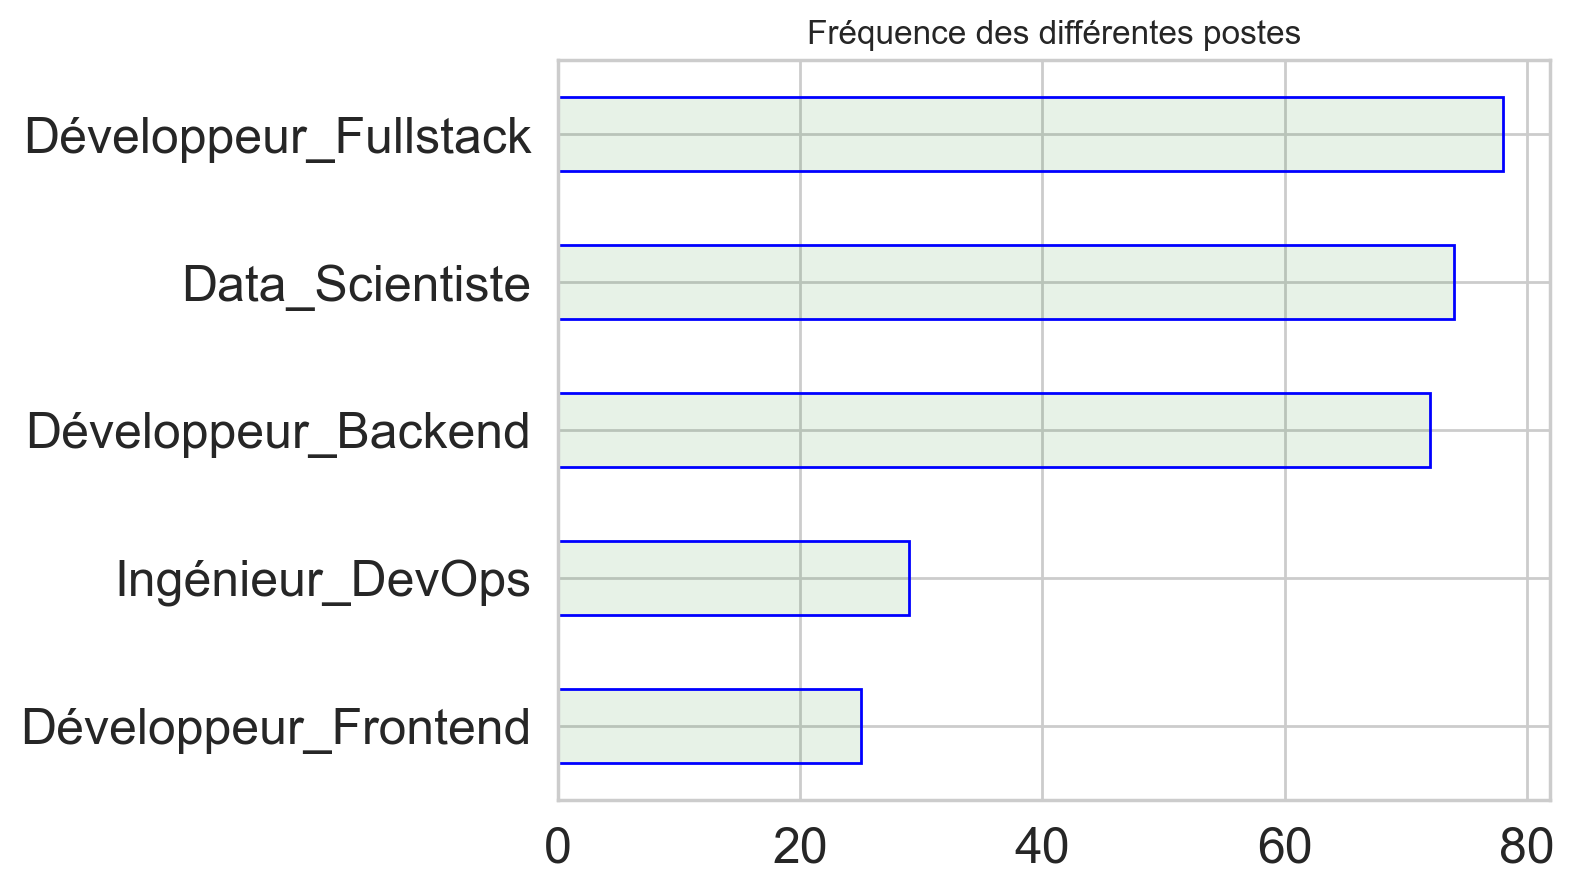

In [424]:
# fréquence des postes en se basant sur notre jeu de données
ds.Title.value_counts(ascending=True).plot.barh(color=(0.1, 0.5, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des différentes postes')
plt.show()

In [425]:
# on divise le dataset en Train Data et Test Data
# visulaiser la fréquence en se basant sur ces deux échantillons
train_data, test_data = train_test_split(ds, test_size=.2)

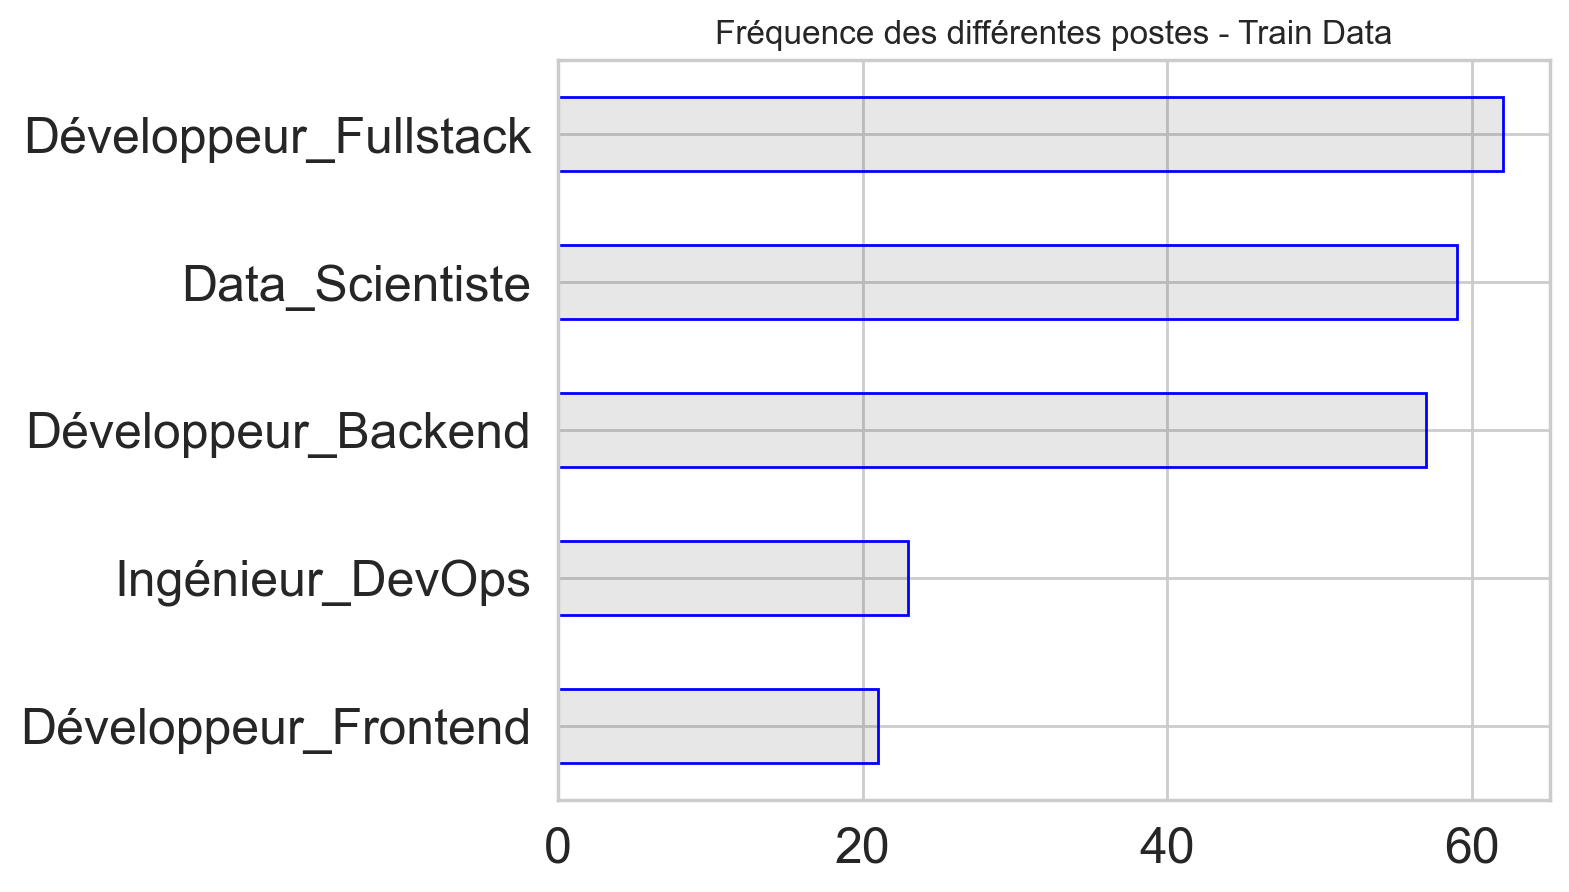

In [426]:
train_data['Title'].value_counts(ascending=True).plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des différentes postes - Train Data')
plt.show()

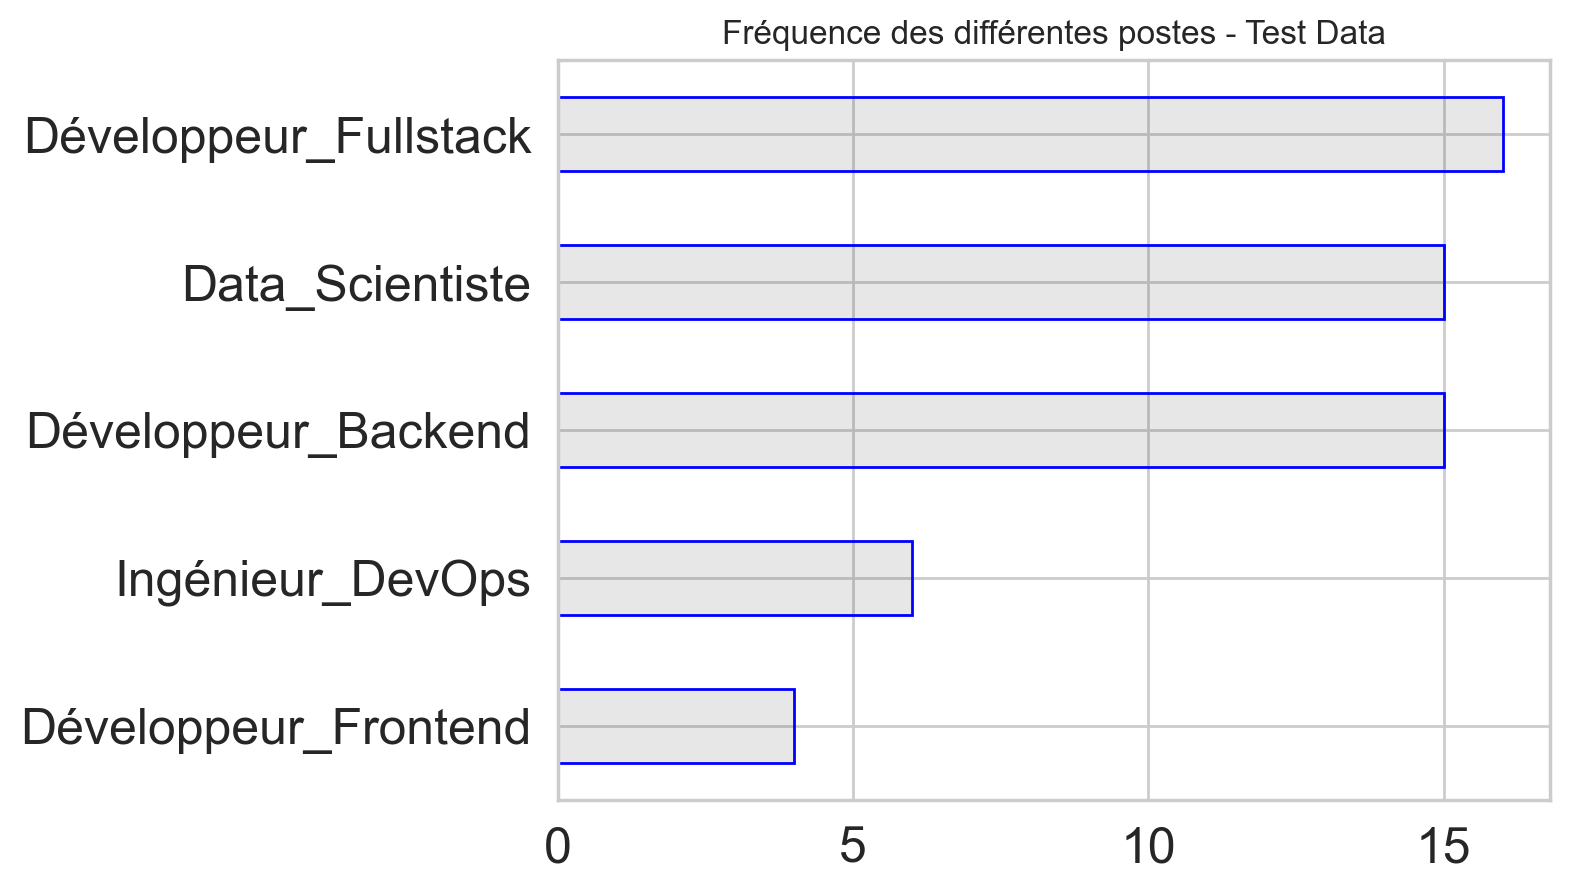

In [427]:
test_data['Title'].value_counts(ascending=True).plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des différentes postes - Test Data')
plt.show()

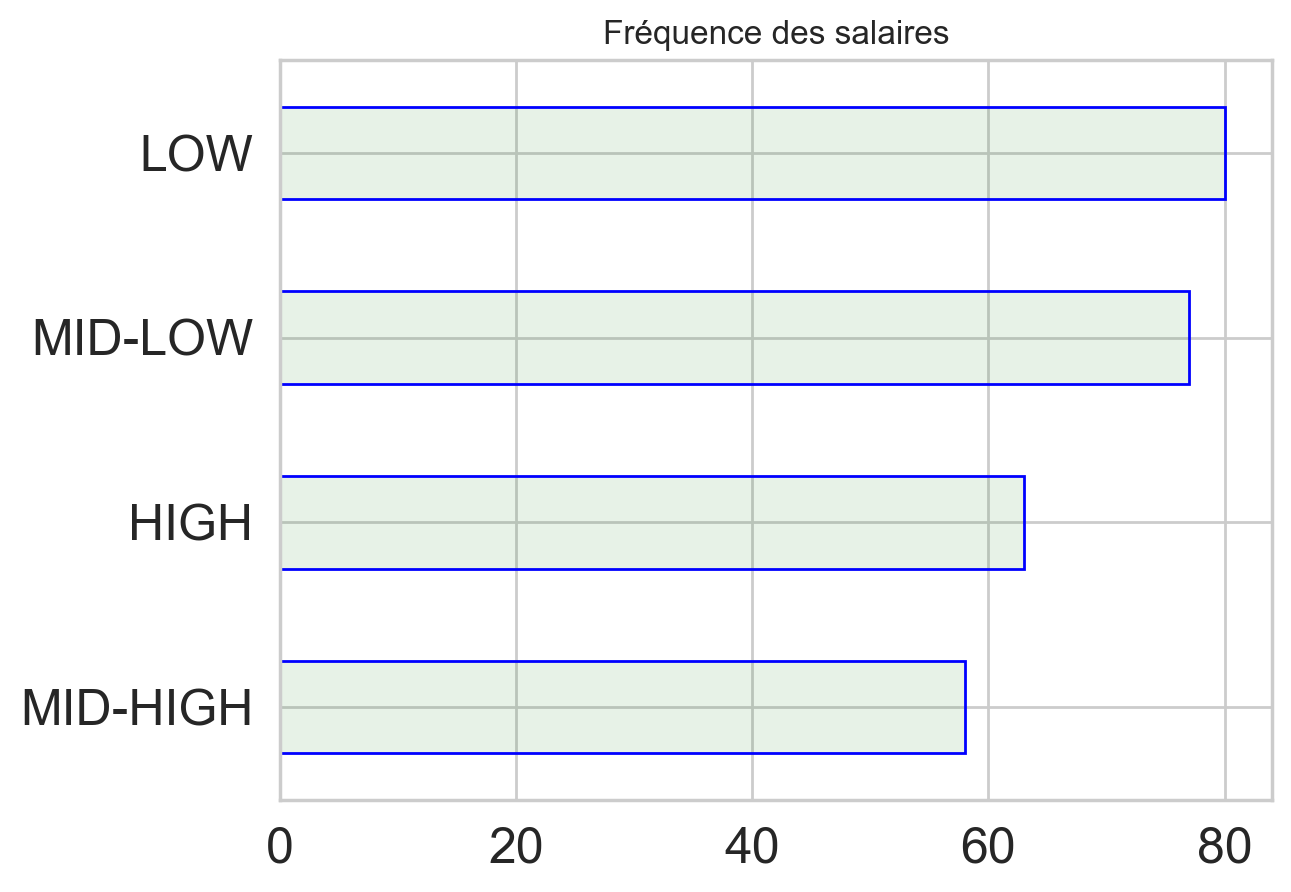

In [428]:
# fréquence des bandes de salaire en se basant sur notre jeu de données
ds.salary_band.value_counts(ascending=True).plot.barh(color=(0.1, 0.5, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des salaires')
plt.show()

In [429]:
# on divise le dataset en Train Data et Test Data
# visulaiser la fréquence des bandes de salaires en se basant sur ces deux échantillons
train_data, test_data = train_test_split(ds, test_size=.2)

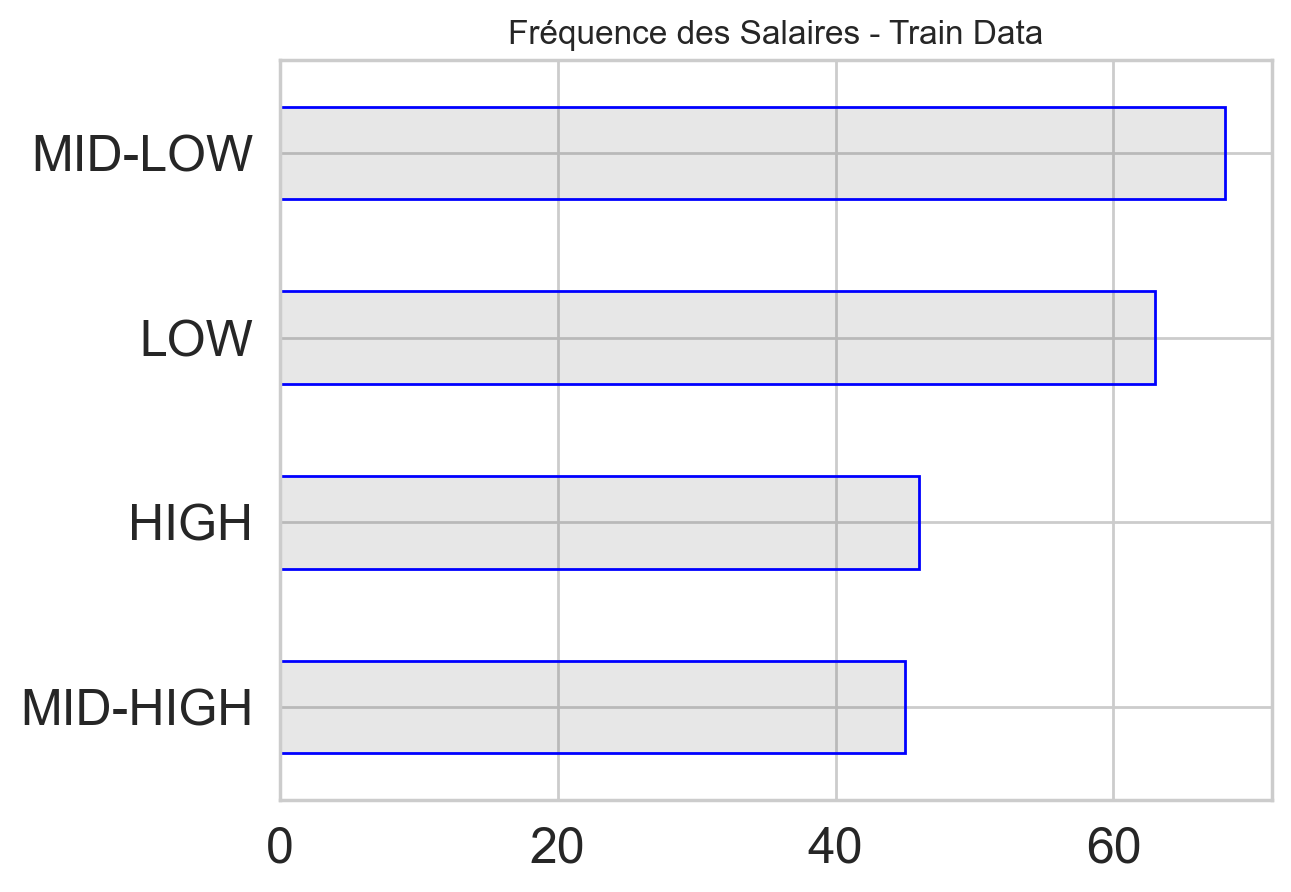

In [430]:
train_data['salary_band'].value_counts(ascending=True).plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des Salaires - Train Data')
plt.show()

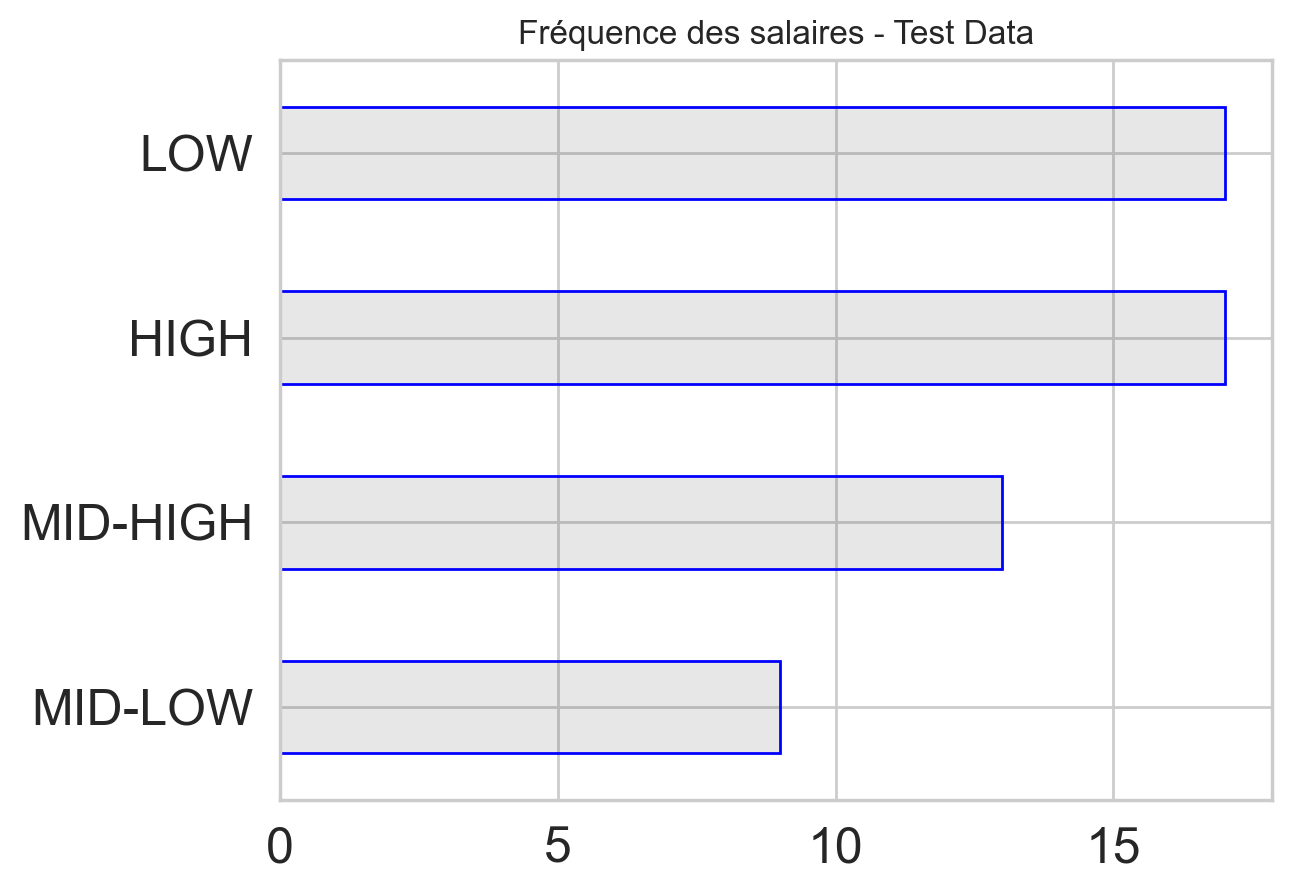

In [431]:
test_data['salary_band'].value_counts(ascending=True).plot.barh(color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Fréquence des salaires - Test Data')
plt.show()

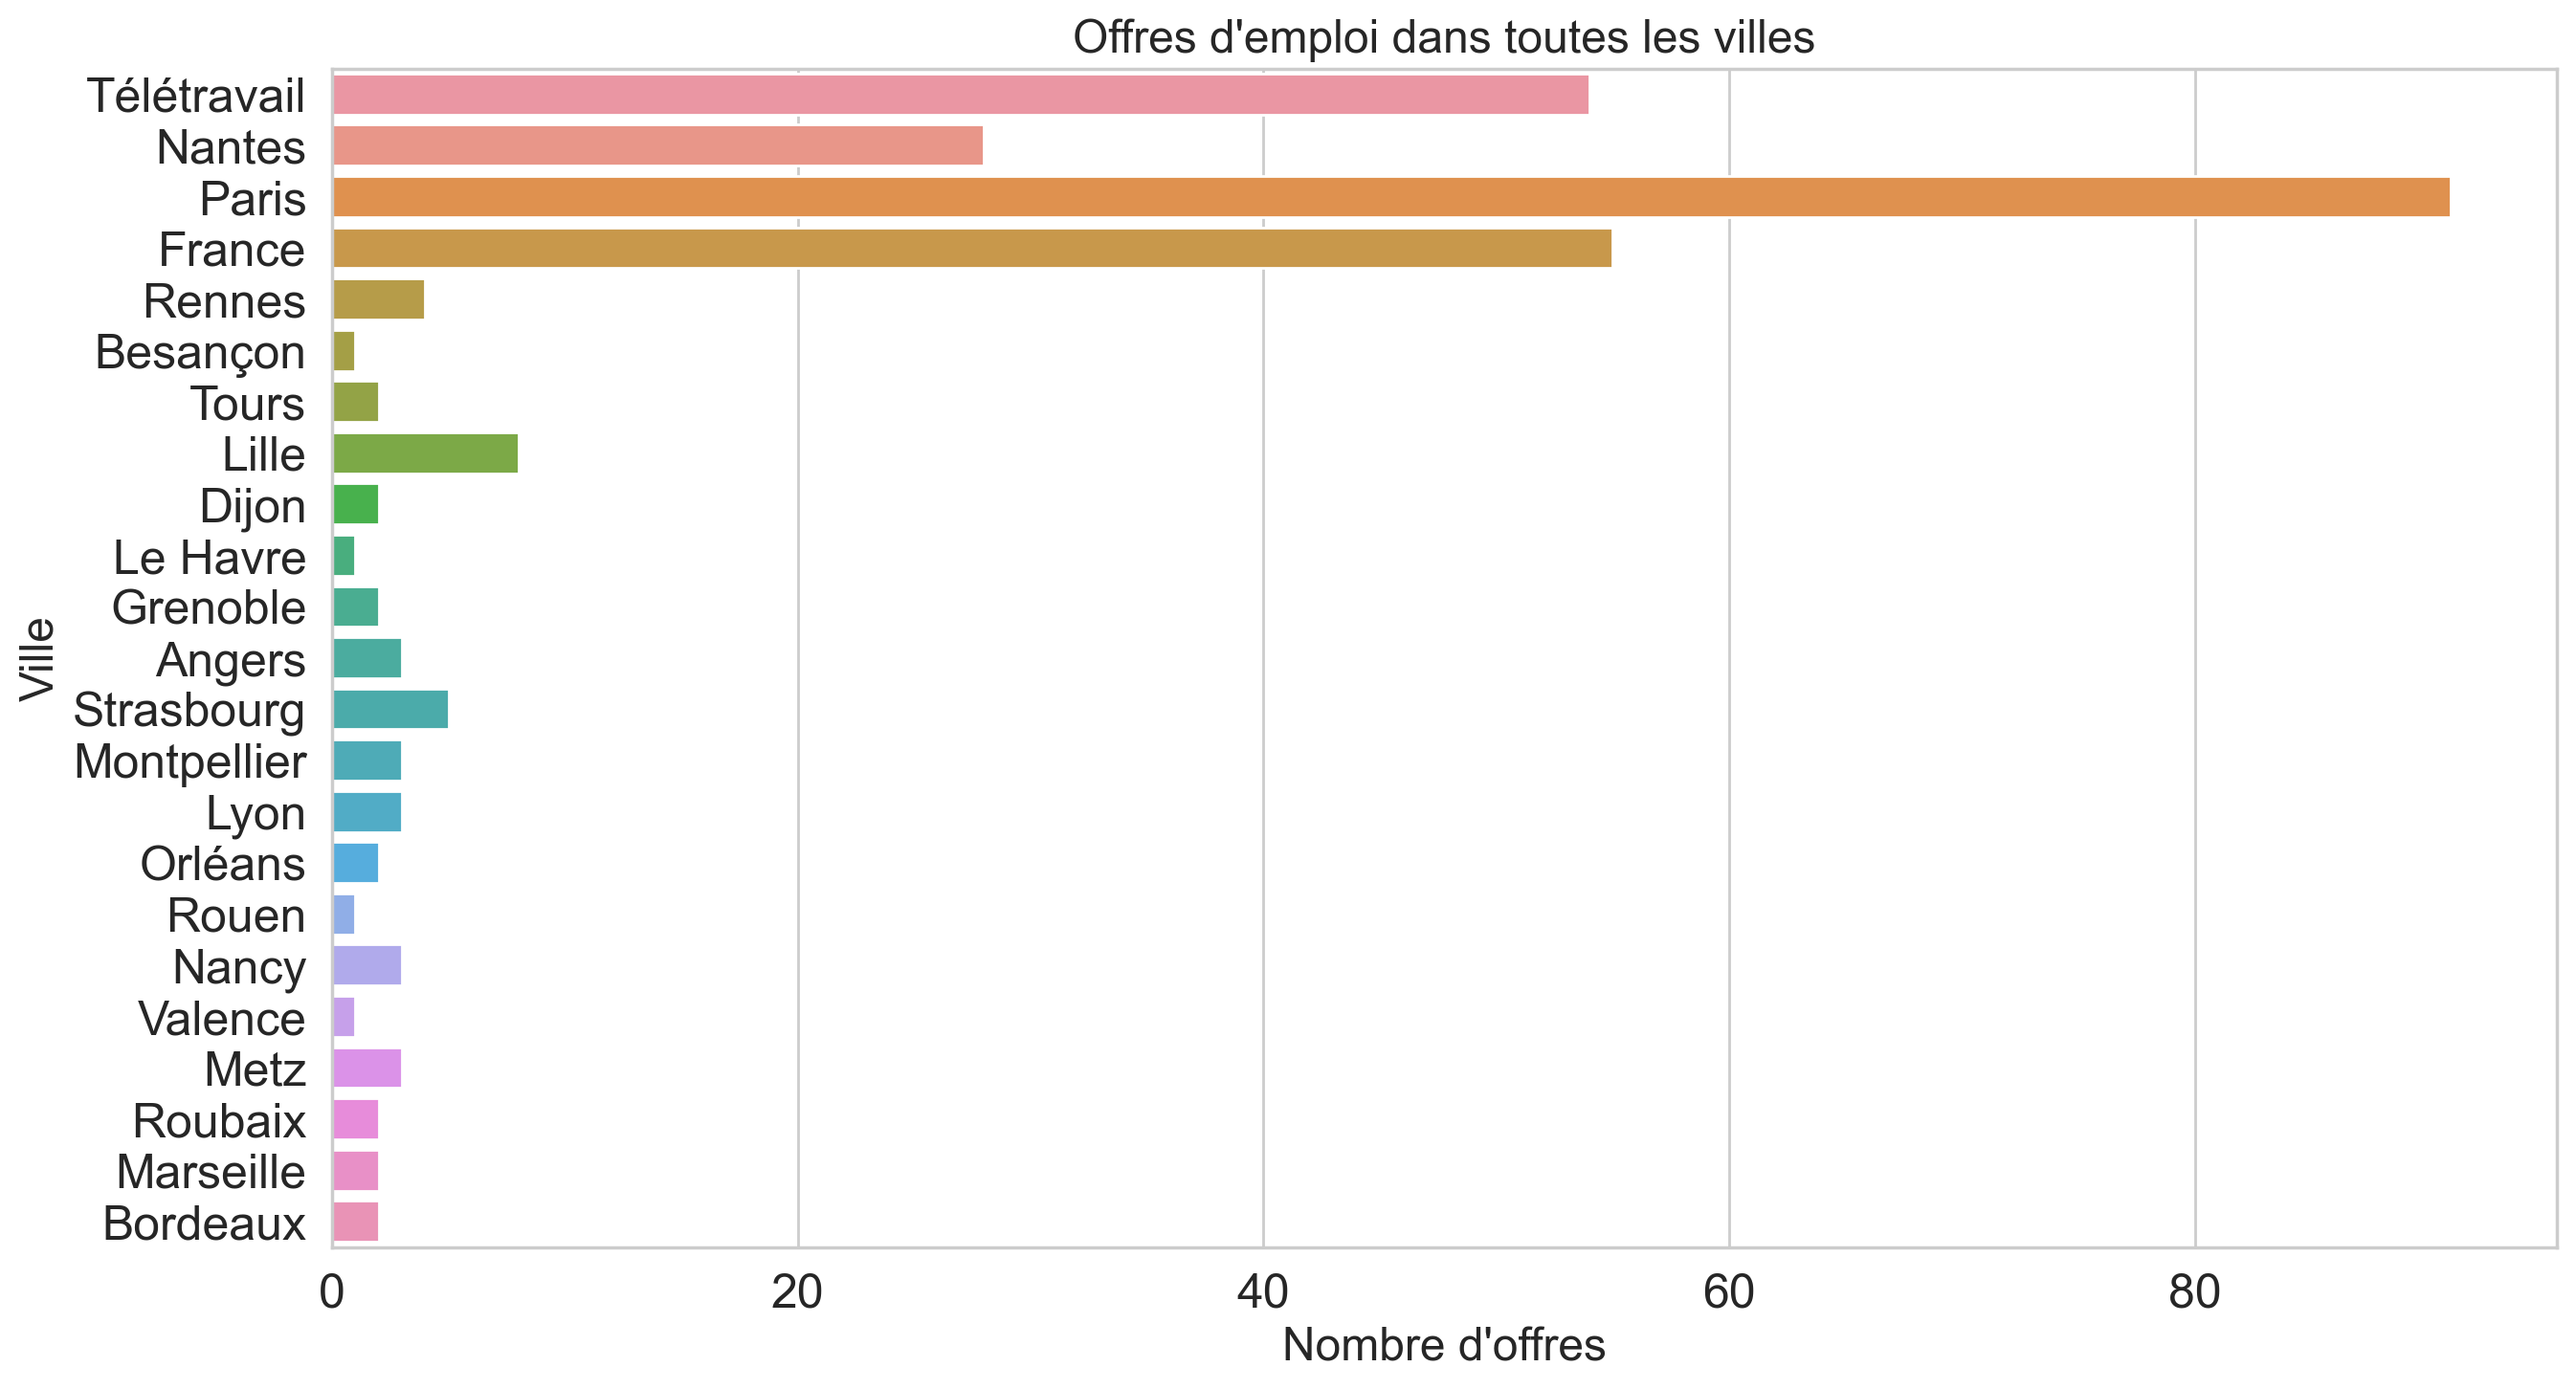

In [432]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot(y='Location',data=ds)
plt.xlabel("Nombre d'offres",{
      'fontsize'            : 'x-large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      })
plt.ylabel('Ville',fontsize= 'x-large')
plt.title("Offres d'emploi dans toutes les villes",fontsize = 'x-large')
plt.show()

In [433]:
# Importez les bibliothèques de visualisation de données pertinentes
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")

In [434]:
ds.describe()

,Salary,jobtype
count,278.000000,278.000000
mean,46534.892086,0.410072
std,10273.876224,0.492733
min,27000.000000,0.000000
25%,40000.000000,0.000000
50%,45000.000000,0.000000
75%,52500.000000,1.000000
max,90000.000000,1.000000


In [437]:
# salaire minimum
ds.replace(30.01 , 56719,inplace=True)
ds[ds.Salary == ds.Salary.min()]

,Title,Company,Location,Contract,Salary,Description,Jobtype,jobtype,salary_band
77,Développeur_Frontend,Cristal'ID,France,45 000 € par an,27000.0,"Intégré au studio de production, vous participez à la création des sites web de nos clients, e-commerce sous prestashop ou sites vitrines / catalogues…",Temps Plein,1,LOW
279,Développeur_Fullstack,Cristal'ID,France,De 400 € à 550 € par jour,27000.0,Vous pouvez également être amené à intervenir sur nos sites vitrines développés sous notre propre CMS ou sur nos projets internes.,Contract,0,LOW


In [438]:
# salaire maximum
ds[ds.Salary == ds.Salary.max()]

,Title,Company,Location,Contract,Salary,Description,Jobtype,jobtype,salary_band
320,Data_Scientiste,Data Recrutement,Télétravail,CDI,90000.0,Fonction Data scientist ml ia nlp dl.,Contract,0,HIGH


In [513]:
ds.Salary.value_counts()

45000.0    28
42500.0    27
50000.0    22
60000.0    19
40000.0    18
52500.0    14
55000.0    14
41000.0    10
65000.0    8 
35000.0    8 
57500.0    7 
32500.0    7 
47500.0    6 
38000.0    5 
41500.0    5 
52000.0    4 
37500.0    4 
36000.0    4 
30000.0    4 
39000.0    4 
47000.0    3 
38500.0    3 
67500.0    3 
34000.0    3 
42000.0    3 
48500.0    3 
40500.0    2 
70000.0    2 
31500.0    2 
36500.0    2 
39500.0    2 
32000.0    2 
29500.0    2 
35500.0    2 
62500.0    2 
46000.0    2 
75000.0    2 
27000.0    2 
51000.0    1 
50500.0    1 
72500.0    1 
59500.0    1 
90000.0    1 
56000.0    1 
29000.0    1 
80000.0    1 
43000.0    1 
43200.0    1 
28000.0    1 
48000.0    1 
28500.0    1 
33000.0    1 
53500.0    1 
34500.0    1 
31000.0    1 
49000.0    1 
Name: Salary, dtype: int64

C:\Users\Samar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Samar\AppData\Local\Temp\ipykernel_19528\4257585699.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major')


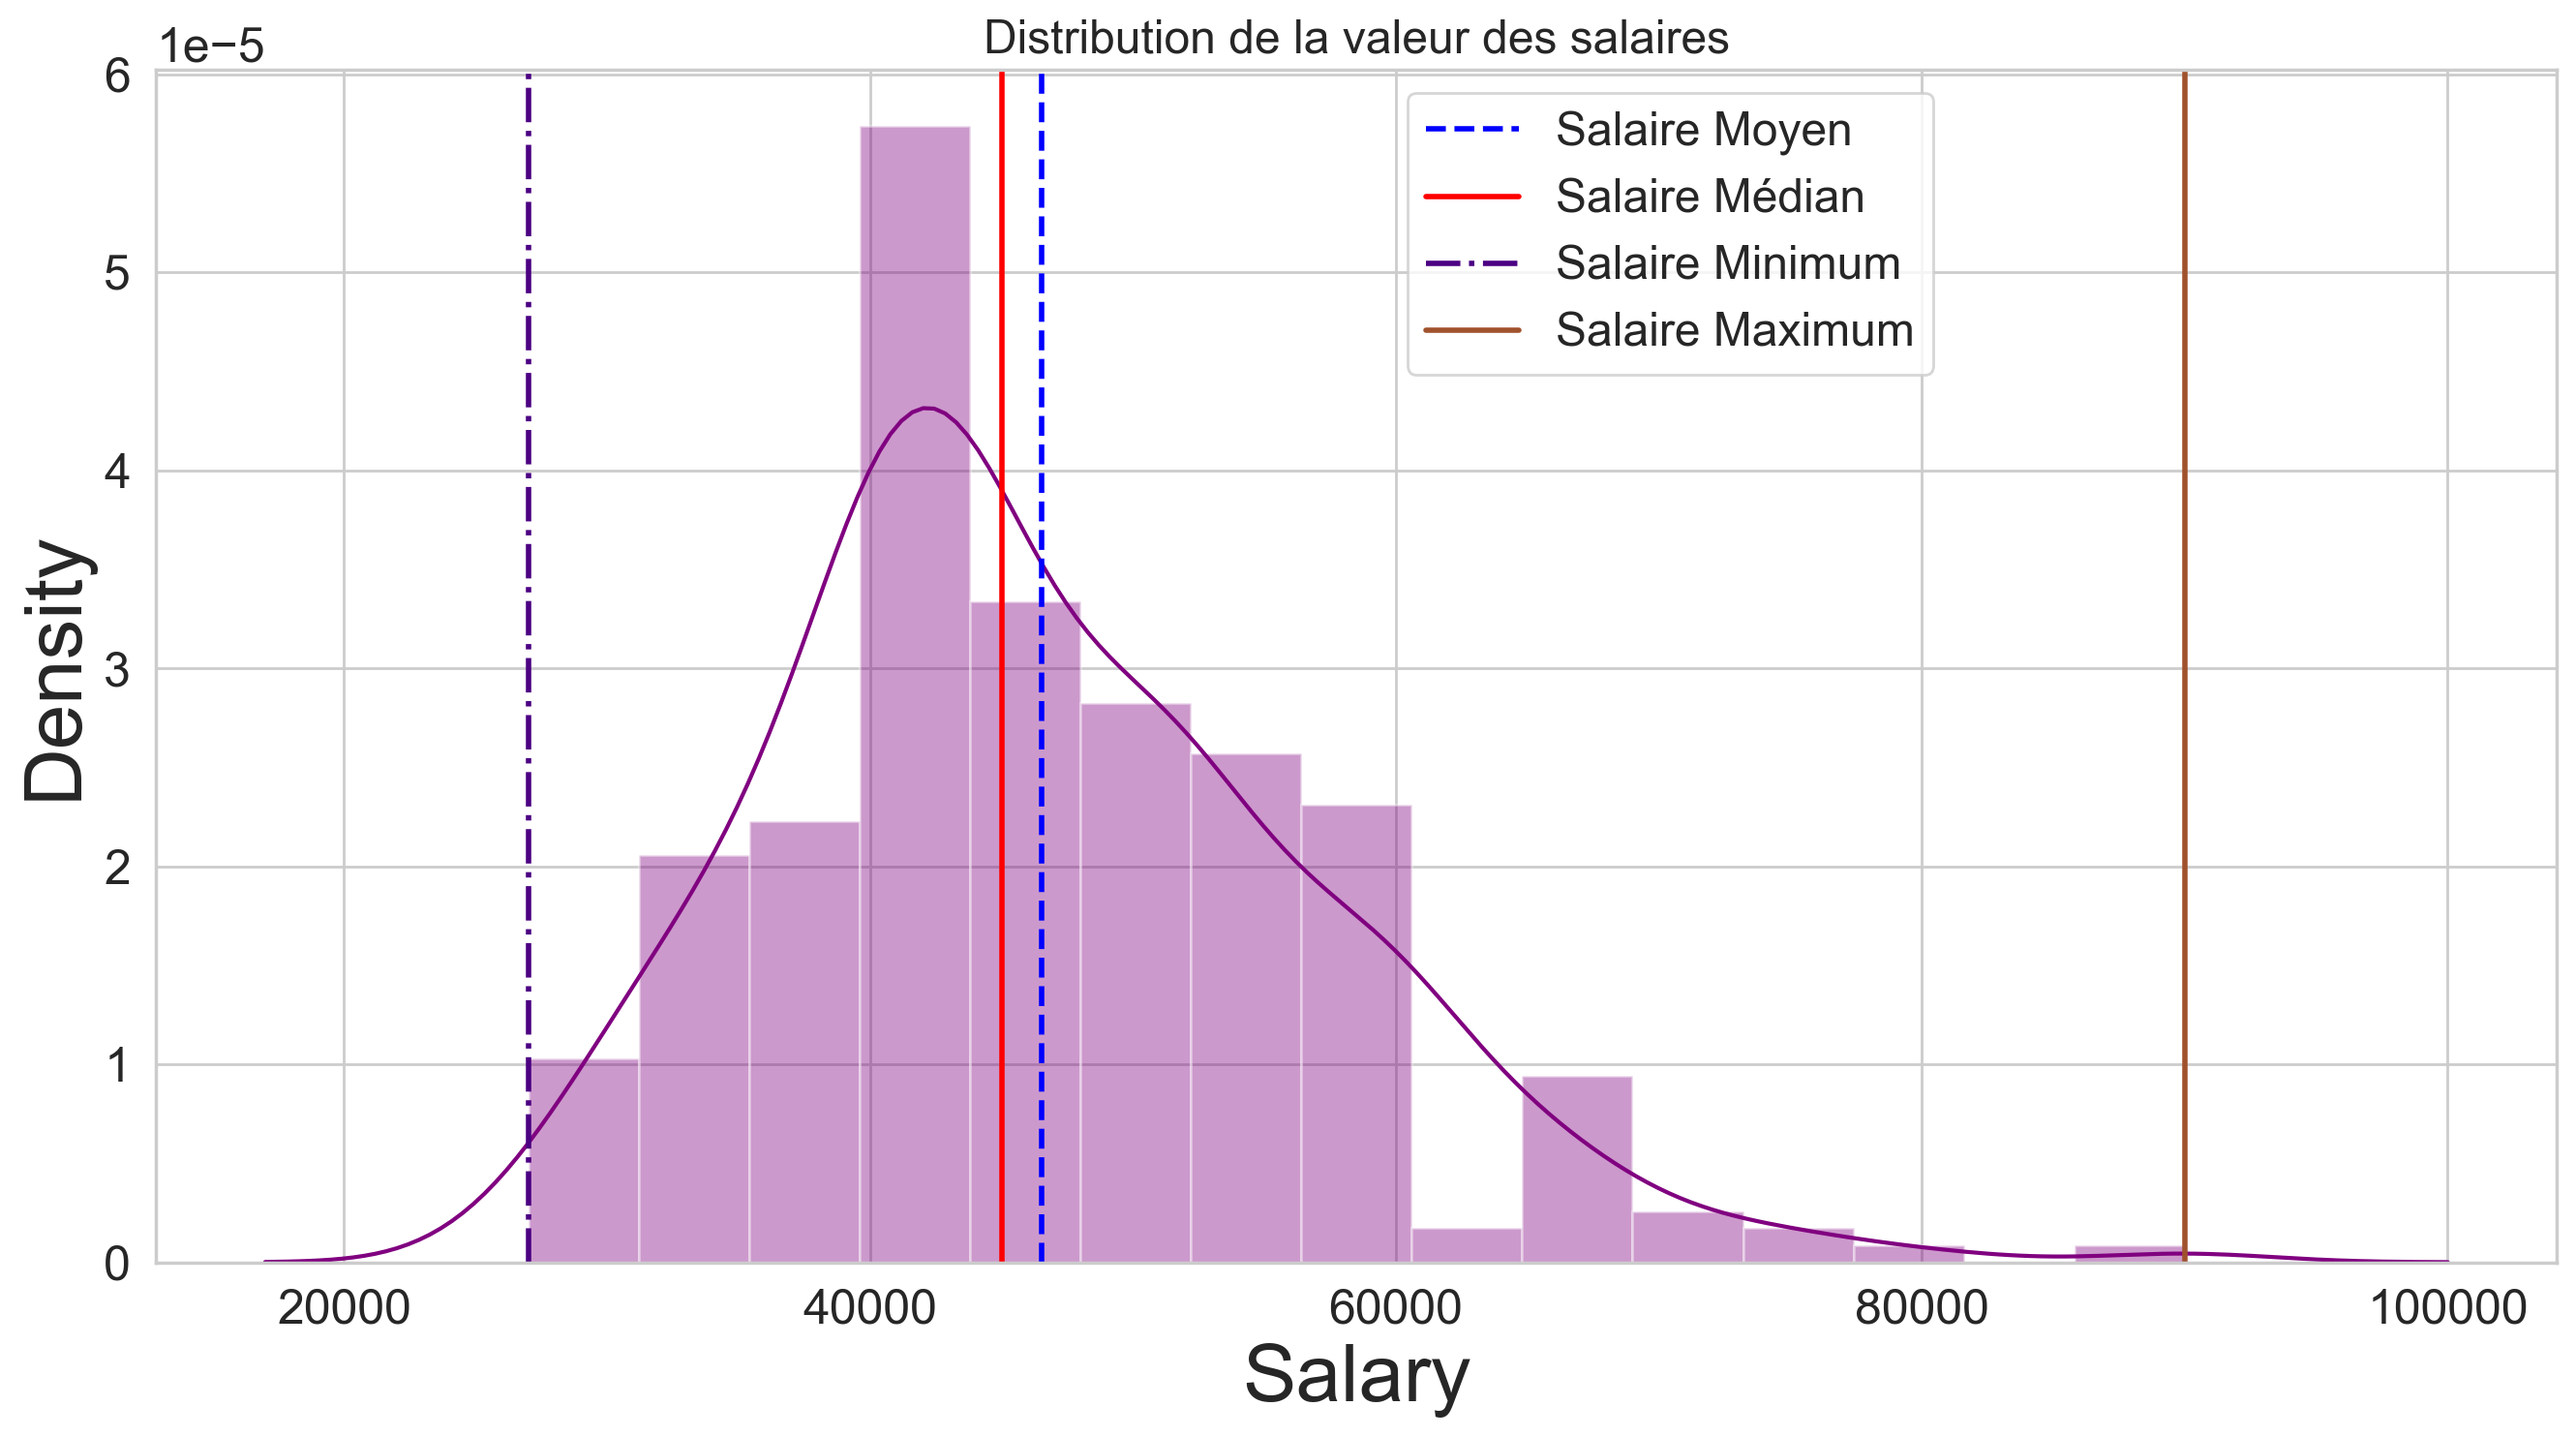

In [527]:
# comme nous avons nettoyé la colonne Salary, traçons-la 
# Ici, nous pouvons voir que la distribution des valeurs de salaire est déviée vers la droite.
plt.figure(figsize=(16,8))
plt.title("Distribution de la valeur des salaires",fontsize = 'x-large',fontstyle='normal')
ax = sns.distplot(ds.Salary,bins=15,color='purple',)
ax.grid(b=True, which='major')
plt.axvline(ds.Salary.mean(), color='blue', linestyle='dashed', linewidth=2,label='Salaire Moyen')
plt.axvline(ds.Salary.median(), color='red', linestyle='solid', linewidth=2,label='Salaire Médian')
plt.axvline(ds.Salary.min(), color='indigo', linestyle='dashdot', linewidth=2,label='Salaire Minimum')
plt.axvline(ds.Salary.max(), color='sienna', linestyle='solid', linewidth=2,label='Salaire Maximum')
plt.legend(loc='upper right', bbox_to_anchor=(0.75, 1),fontsize='x-large')
plt.show()

L'histogramme ci-dessus confirme que la distribution a une inclinaison positive. Nous pouvons également voir qu'il y a plusieurs enregistrements suppérieurs à 80000 € par an - il peut s'agir de valeurs aberrantes. Ci-dessus, on va poursuivre d'utiliser un boxplot pour identifier les valeurs aberrantes.

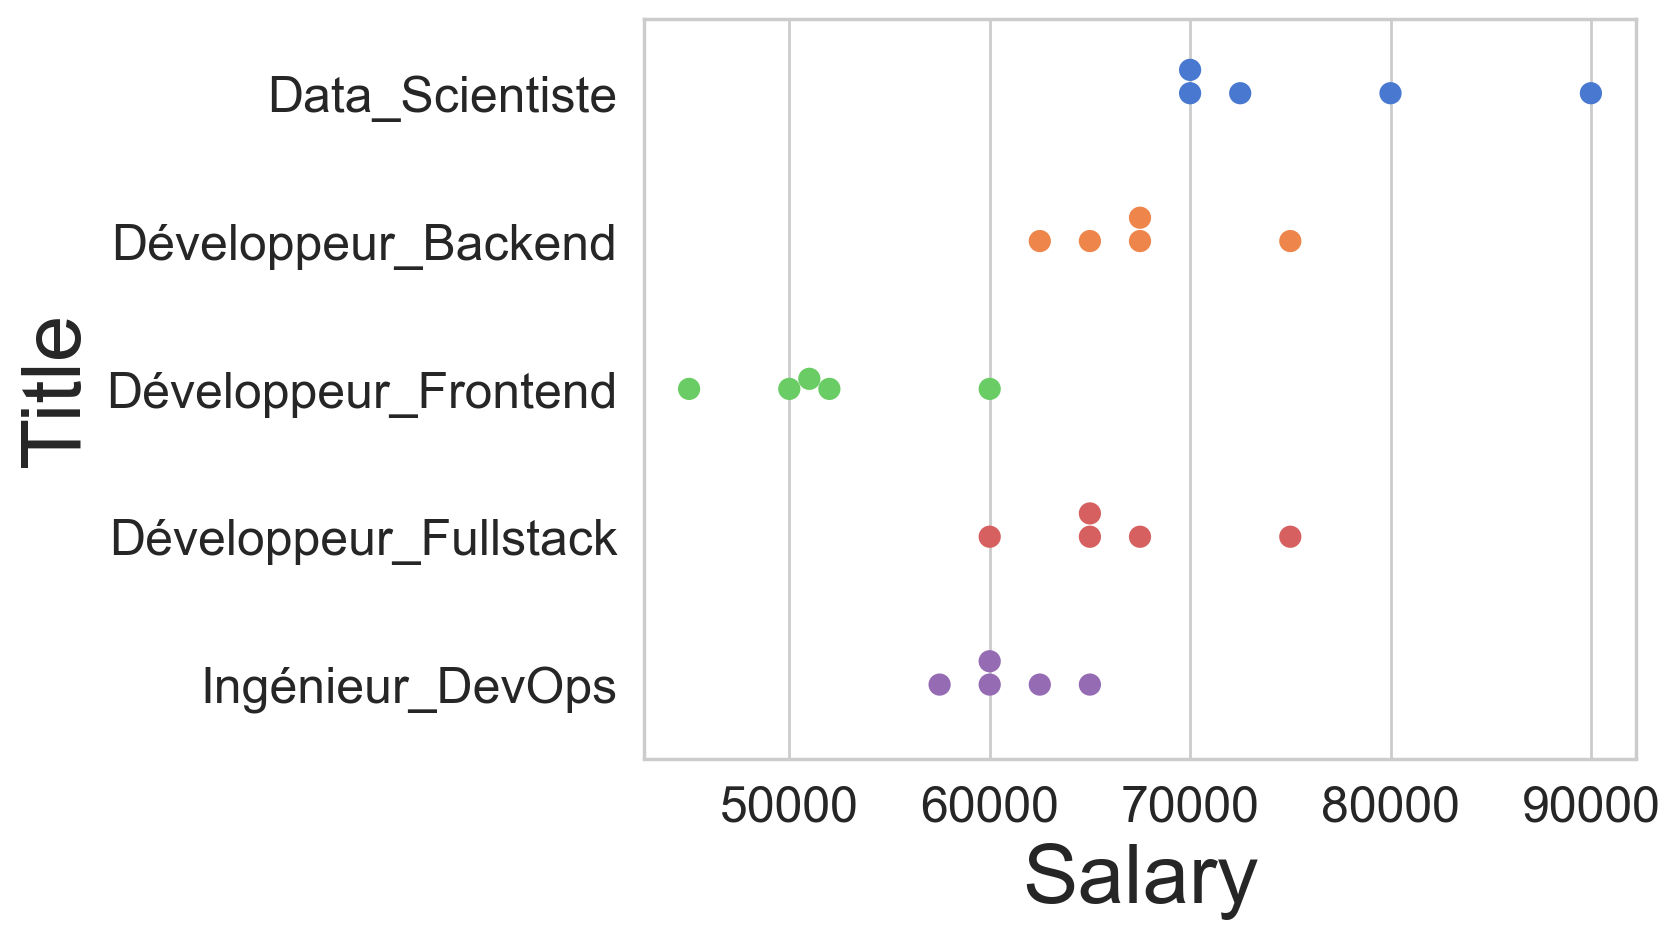

In [444]:
# Distribution des salaires selon le poste
figure = plt.figure()
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18

sns.swarmplot(data = top_5, x='Salary', y='Title', size=8)
plt.show();

C:\Users\Samar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


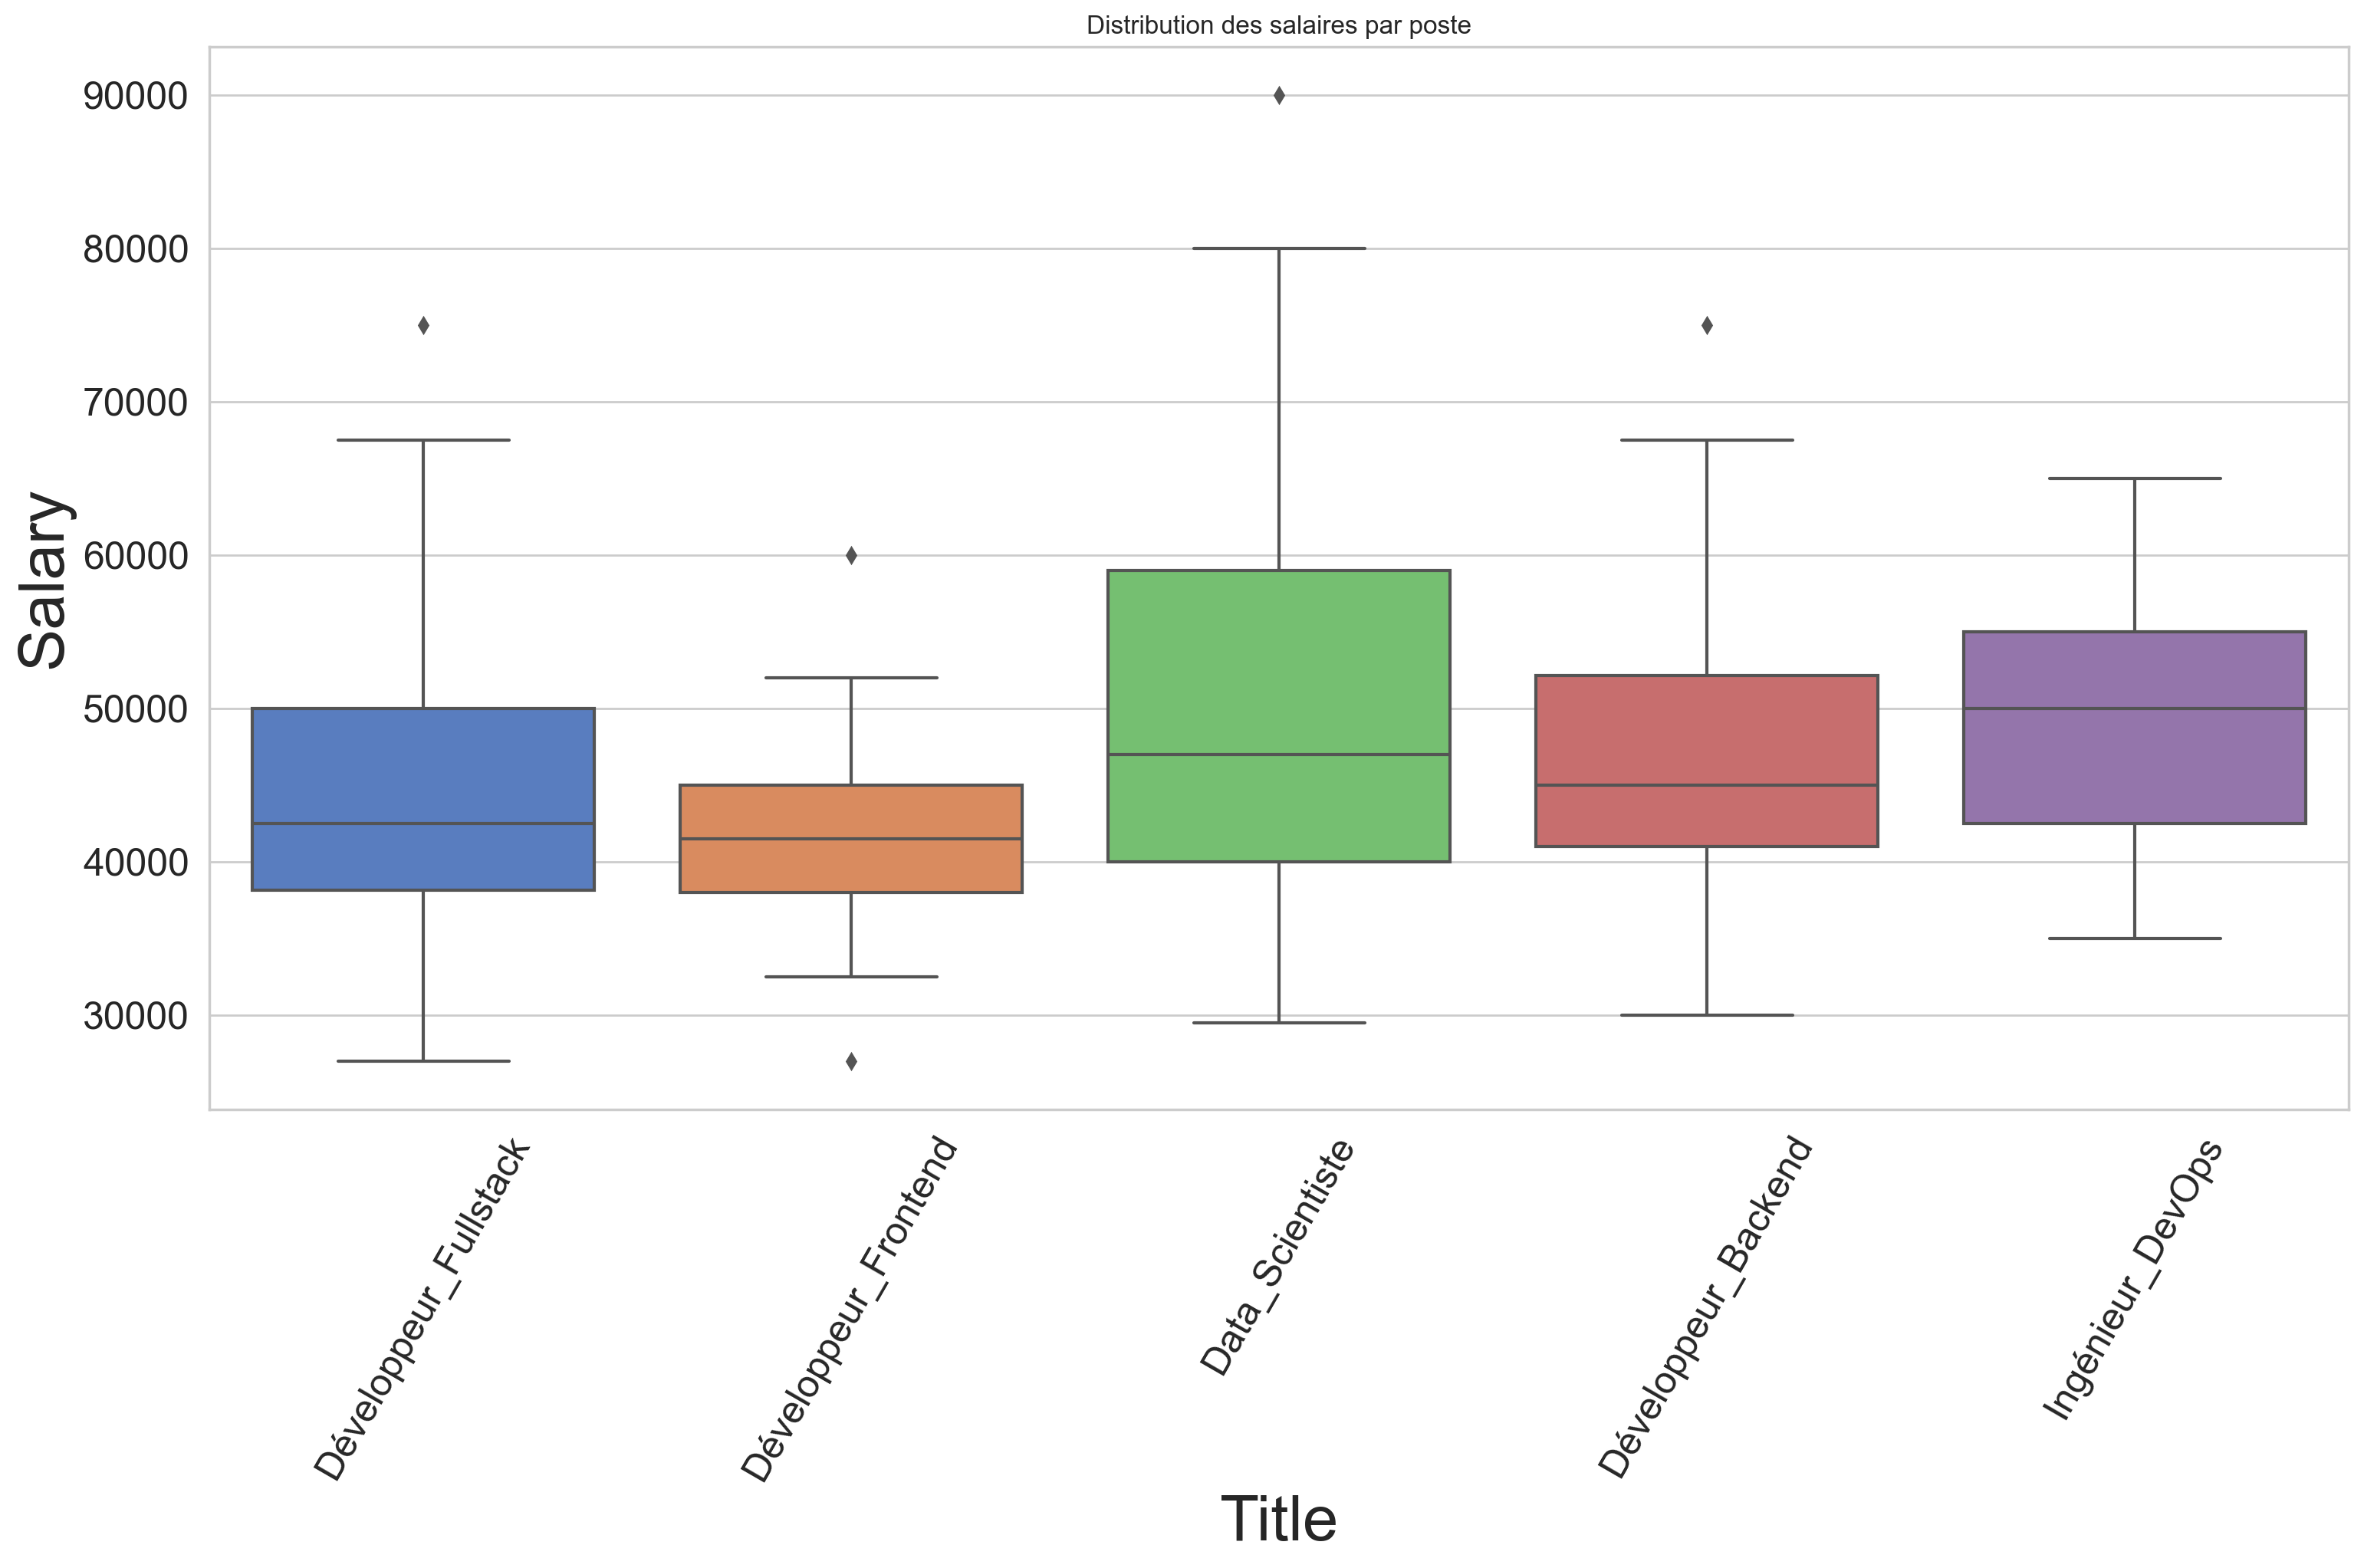

In [446]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
g = sns.boxplot('Title', 'Salary', data=ds, ax=ax)
g.set(title='Distribution des salaires par poste')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.show()

In [449]:
# Ajoutons une colonne Payscale pour vérifier si le salaire est suppérieur ou inférieur du salaire moyen
ds['Payscale'] = [1 if i > ds.Salary.median() else 0 for i in ds.Salary]

<Figure size 640x480 with 0 Axes>

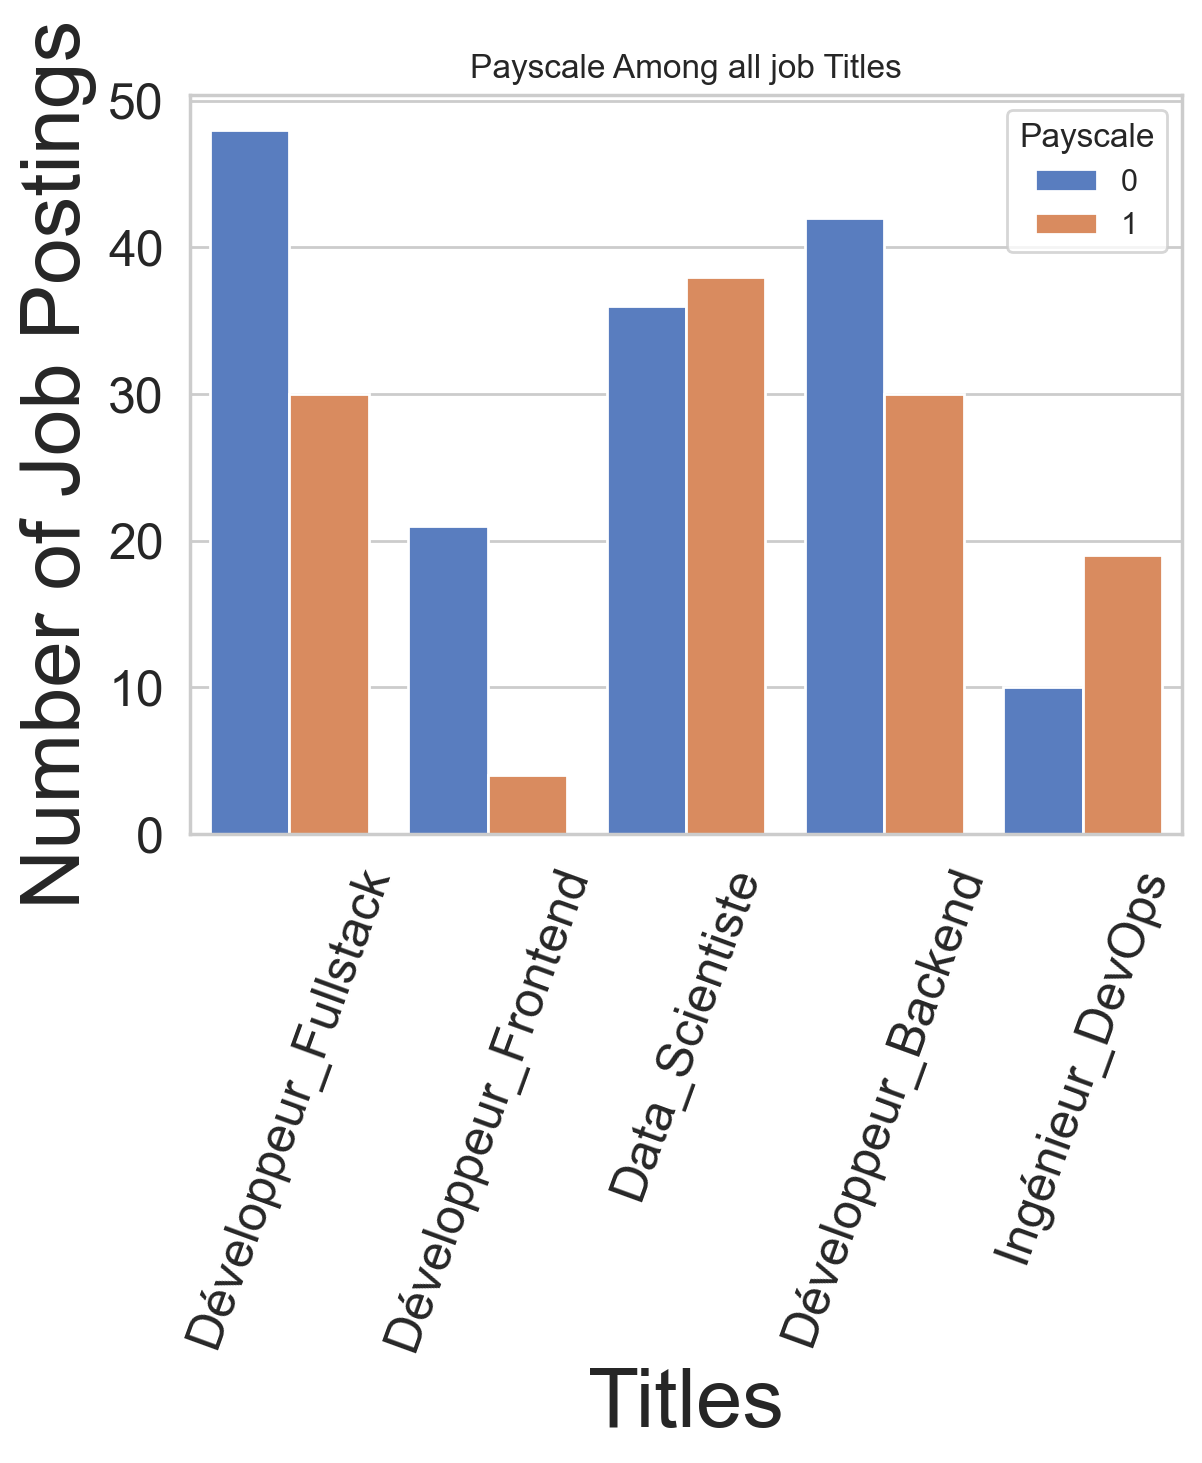

In [450]:
# Voyons le graphique des emplois à haut salaire dans toutes les villes. 
plt.clf()
plt.figure()
sns.countplot(x="Title", hue="Payscale", data=ds)
plt.ylabel("Number of Job Postings")
plt.xlabel("Titles")
plt.title("Payscale Among all job Titles")
plt.xticks(rotation=70)
plt.show()

C:\Users\Samar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


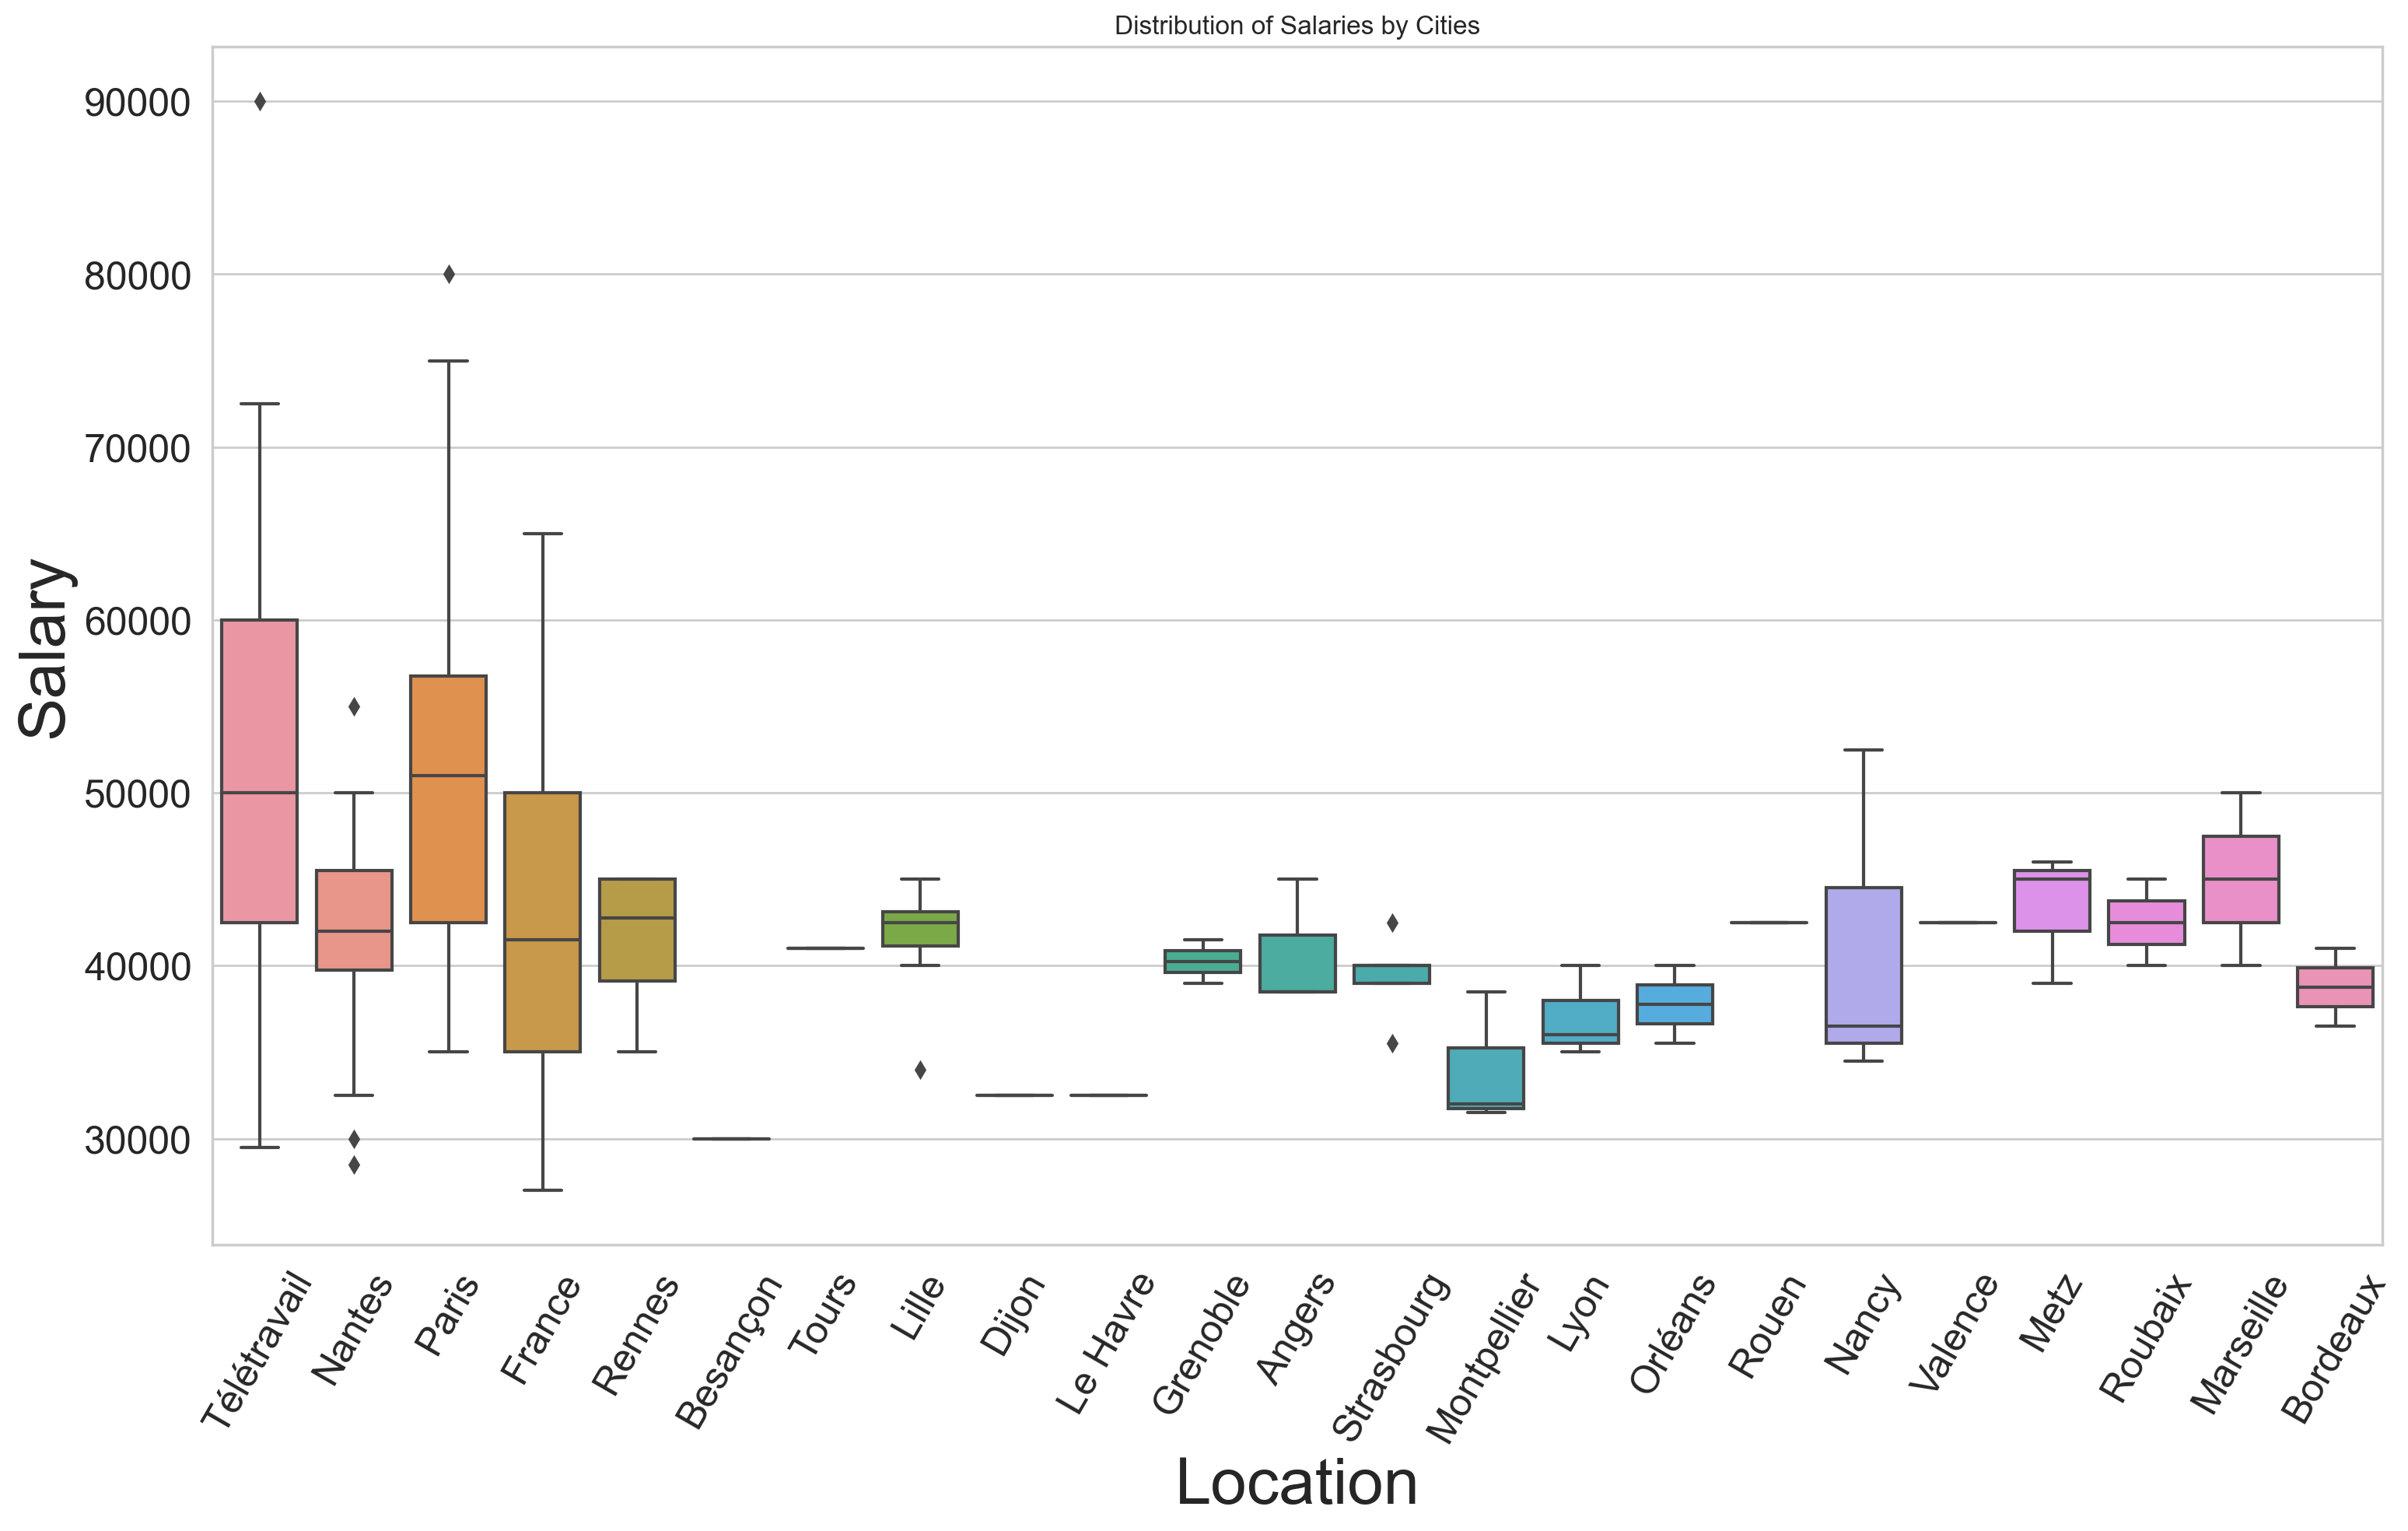

In [451]:
# Salaires aberrants avec la colonne Location 

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
g = sns.boxplot('Location', 'Salary', data=ds, ax=ax)
g.set(title='Distribution of Salaries by Cities')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.show()


C:\Users\Samar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


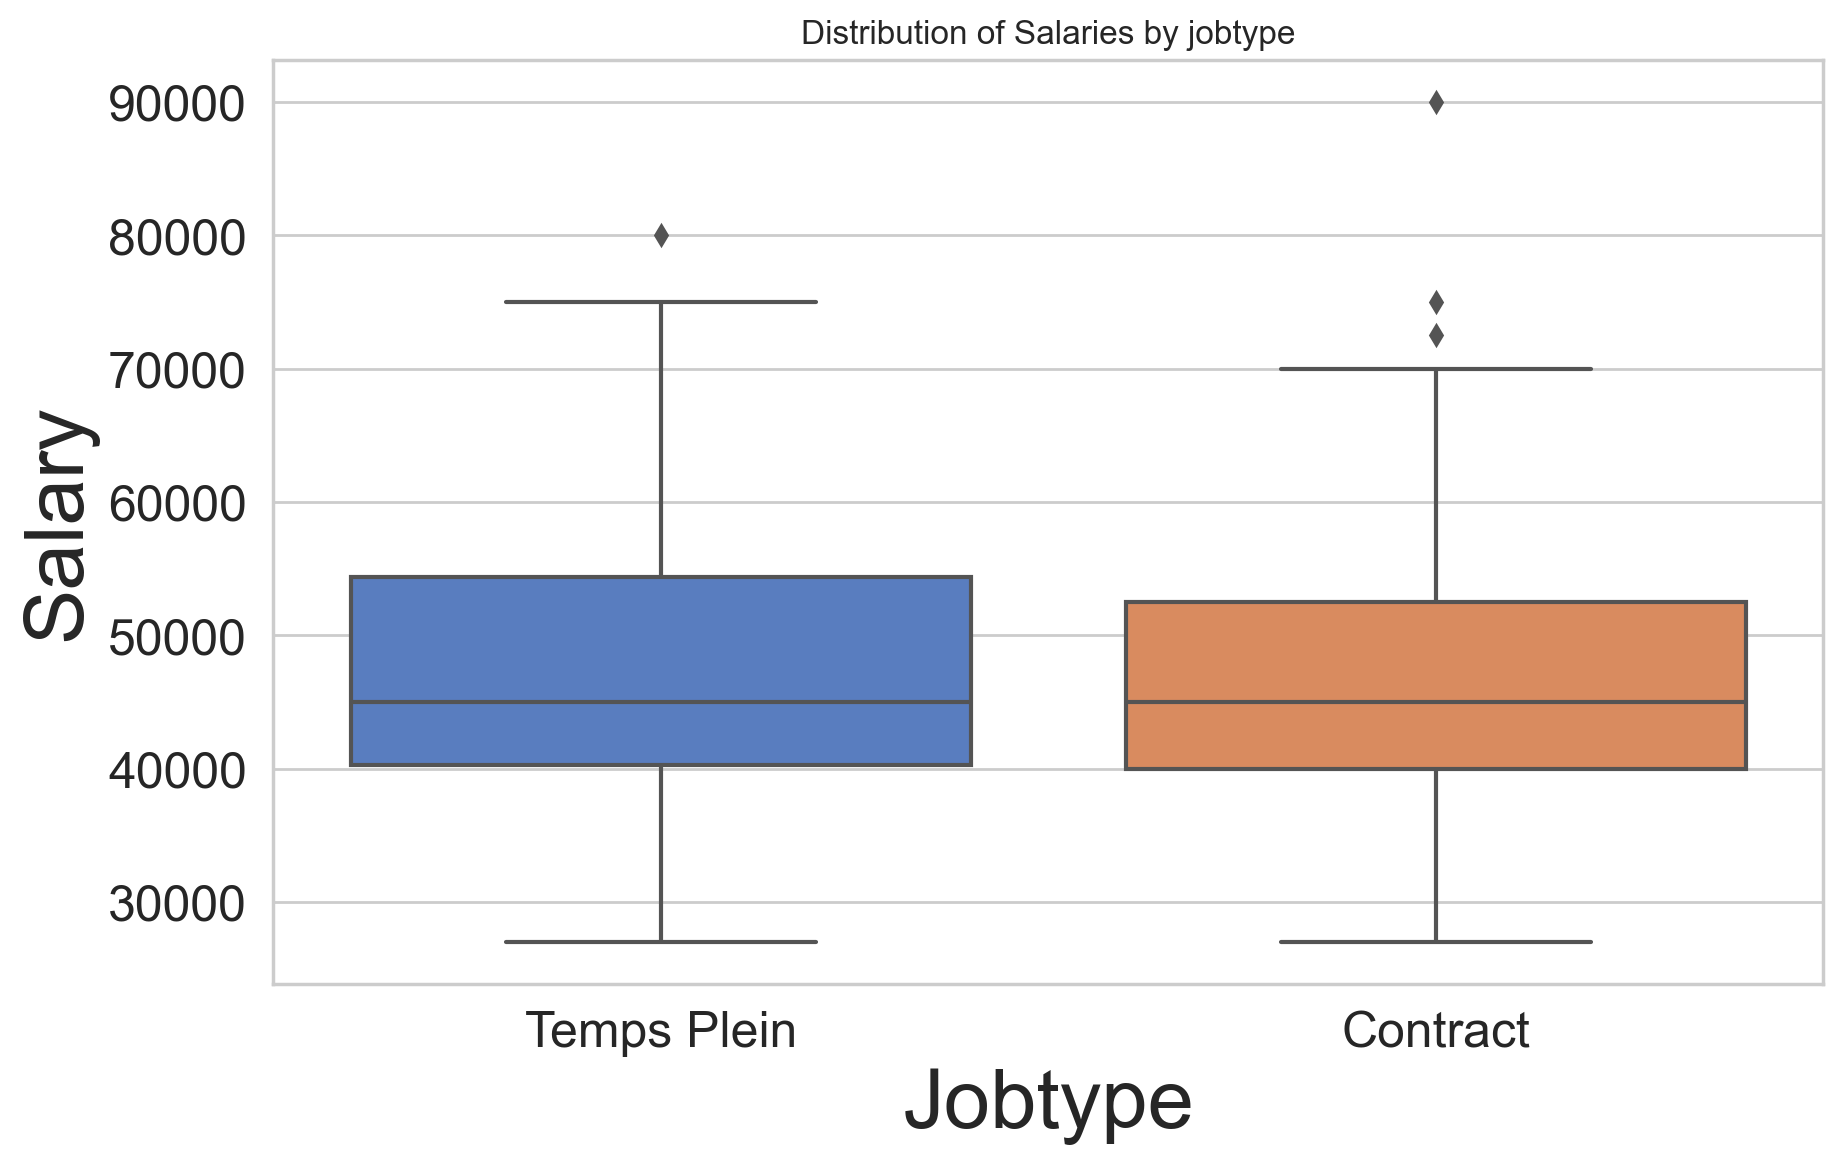

In [452]:
# Salaires aberrants avec la colonne Jobtype

fig, ax = plt.subplots(1, 1, figsize=(10, 6),)
g = sns.boxplot('Jobtype', 'Salary', data=ds, ax=ax)
g.set(title='Distribution of Salaries by jobtype')
plt.show()

In [453]:
ds.salary_band.value_counts()

LOW         80
MID-LOW     77
HIGH        63
MID-HIGH    58
Name: salary_band, dtype: int64

In [455]:
baseline_accuracy = 80/(80+77+63+58)
baseline_accuracy

0.28776978417266186

In [456]:
# Ces modèles LogisticRegression et DecisionTreeClassifier et RandomForestClassifier viseront 
# à prédire la fourchette de salaire de chaque emploi 
# en se basant uniquement sur le lieu de travail.

In [457]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [458]:
# Logistic Regression

In [459]:
y = ds.salary_band.copy()
X = pd.get_dummies(ds.Title, drop_first = True).copy()

sc = StandardScaler()

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [461]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [462]:
kf = StratifiedKFold(n_splits = 10)

In [463]:
loc1_lr = LogisticRegression(max_iter=1000)

In [464]:
loc1_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [465]:
loc1_lr_cv_score = cross_val_score(loc1_lr, X_train, y_train, cv = kf).mean()
loc1_lr_cv_score

0.29328063241106717

In [466]:
# Le score ci-dessus est le score de précision de ce modèle. 
# Cela signifie que pour toutes les prédictions faites par le modèle, combien d'entre elles sont correctes. 
# Dans ce cas, le modèle a un score de précision de 39.54%.

In [467]:
# Les tableaux suivants montrent l'importance des caractéristiques pour la prédiction de chaque classe. 
# L'importance des caractéristiques classe chaque prédicteur en fonction de sa contribution à la classification d'une ligne 
# en tant que HIGH, MID-HIGH, MID-LOW, et LOW.

In [468]:
loc1_lr_coefs = pd.DataFrame(loc1_lr.coef_, columns=X.columns,index=loc1_lr.classes_).transpose()

loc1_lr_coefs.HIGH.sort_values(ascending=False)

Ingénieur_DevOps        -0.005889
Développeur_Fullstack   -0.144907
Développeur_Backend     -0.202136
Développeur_Frontend    -0.734722
Name: HIGH, dtype: float64

In [469]:
# les 3 caractéristiques les plus importantes sont: Paris, Nancy et France

In [470]:
loc1_lr_coefs.LOW.sort_values(ascending=False)

Développeur_Frontend     0.185587
Développeur_Fullstack    0.048841
Ingénieur_DevOps        -0.124838
Développeur_Backend     -0.142643
Name: LOW, dtype: float64

In [471]:
# les 3 caractéristiques les plus importantes sont: Montpellier, Dijon et Strasbourg

In [472]:
loc1_lr_coefs['MID-HIGH'].sort_values(ascending=False)

Développeur_Frontend     0.127167
Ingénieur_DevOps         0.125096
Développeur_Backend      0.101327
Développeur_Fullstack   -0.045358
Name: MID-HIGH, dtype: float64

In [473]:
# les 3 caractéristiques les plus importantes sont: Nantes, Télétravail et Paris

In [474]:
loc1_lr_coefs['MID-LOW'].sort_values(ascending=False)

Développeur_Frontend     0.421969
Développeur_Backend      0.243453
Développeur_Fullstack    0.141424
Ingénieur_DevOps         0.005630
Name: MID-LOW, dtype: float64

In [475]:
# les 3 caractéristiques les plus importantes sont: Lille, Rennes et Rouen

In [476]:
# Decision Tree Classification

In [477]:
loc1_dt = DecisionTreeClassifier()
loc1_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [478]:
loc1_dt_cv_score = cross_val_score(loc1_dt, X_train, y_train, cv= kf).mean()

loc1_dt_cv_score 

0.29328063241106717

In [479]:
# Le score ci-dessus est le score de précision de ce modèle. 
# Dans ce cas, le modèle a un score de précision de 41.5%.

# Il s'agit également d'une amélioration de 1.96% par rapport au modèle de régression logistique ci-dessus.

In [480]:
loc1_dt.score(X_test, y_test)

0.35714285714285715

In [481]:
# Il est également particulièrement important de confirmer que les arbres décisionnels ne s'adaptent pas trop 
# aux données d'apprentissage. Il est très facile pour ces modèles de s'adapter excessivement car ils peuvent 
# continuer à ajouter de la profondeur jusqu'à ce qu'ils aient tout classé correctement.

# Un score de 0,4871 sur des données de test non vues me montre 
# qu'il ne s'est pas adapté de manière excessive aux données d'apprentissage.

In [482]:
dt_ftr_importance = pd.DataFrame(zip(X.columns,loc1_dt.feature_importances_), columns=['feature','importance'])
dt_ftr_importance.sort_values(by='importance',ascending=False)

,feature,importance
1,Développeur_Frontend,0.476012
0,Développeur_Backend,0.278693
2,Développeur_Fullstack,0.159197
3,Ingénieur_DevOps,0.086098


In [483]:
y = ds.salary_band.copy()
X2 = pd.get_dummies(ds[['Title','Location','Jobtype']],drop_first=True)
sc=StandardScaler()
kf = StratifiedKFold(n_splits = 10)

In [484]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, stratify = y)

In [485]:
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [486]:
remod_lr = LogisticRegression(max_iter=1000)

In [487]:
remod_lr.fit(X2_train,y2_train)

LogisticRegression(max_iter=1000)

In [488]:
remod_lr_cv_score = cross_val_score(remod_lr, X2_train, y2_train, cv=kf).mean()
remod_lr_cv_score

0.3697628458498024

In [489]:
# Pour le modèle ci-dessus utilisant des prédicteurs indiquant le titre du poste, le type du poste, et la ville, 
# nous obtenons un score de validation croisée de 36.97%.

# Cela représente une amélioration de 0.12 
# par rapport au score de validation croisée du premier modèle de régression logistique.

# Cela signifie que le deuxième modèle prédit la catégorie correcte pour la bande de salaire 12% 
# plus souvent que le premier modèle.

In [490]:
remod_lr_coefs = pd.DataFrame(remod_lr.coef_, columns=X2.columns,index=remod_lr.classes_).transpose()

remod_lr_coefs.HIGH.sort_values(ascending=False)

Location_Télétravail           0.539551
Location_Paris                 0.510673
Location_France                0.293988
Jobtype_Temps Plein            0.201522
Location_Tours                 0.000000
Title_Ingénieur_DevOps        -0.022573
Location_Valence              -0.025890
Location_Rouen                -0.044906
Location_Le Havre             -0.045775
Location_Lyon                 -0.053278
Location_Besançon             -0.053646
Location_Dijon                -0.053684
Location_Orléans              -0.061598
Location_Montpellier          -0.097777
Location_Metz                 -0.130507
Location_Marseille            -0.146639
Location_Roubaix              -0.148691
Location_Grenoble             -0.157956
Location_Rennes               -0.158782
Location_Nancy                -0.161962
Location_Bordeaux             -0.162639
Location_Nantes               -0.175642
Location_Strasbourg           -0.194095
Title_Développeur_Backend     -0.217498
Title_Développeur_Fullstack   -0.239050


In [491]:
remod_lr_coefs.LOW.sort_values(ascending=False)

Location_Montpellier           0.358241
Location_Lyon                  0.321604
Location_Orléans               0.287402
Location_Dijon                 0.265572
Title_Développeur_Fullstack    0.236312
Location_Le Havre              0.218154
Location_Strasbourg            0.212044
Location_Besançon              0.183104
Location_Bordeaux              0.168261
Title_Développeur_Frontend     0.158032
Location_Grenoble              0.155252
Location_Nancy                 0.154743
Location_Marseille             0.152733
Location_Roubaix               0.111201
Location_Rennes                0.099894
Location_Lille                 0.060347
Location_Tours                 0.000000
Jobtype_Temps Plein           -0.033293
Title_Développeur_Backend     -0.073739
Location_Rouen                -0.108449
Location_France               -0.124597
Location_Valence              -0.130698
Location_Metz                 -0.209510
Location_Nantes               -0.265443
Title_Ingénieur_DevOps        -0.373481


In [492]:
remod_lr_coefs['MID-HIGH'].sort_values(ascending=False)

Location_Paris                 0.500464
Location_Télétravail           0.333907
Title_Ingénieur_DevOps         0.332530
Location_Nantes                0.320366
Location_Nancy                 0.282515
Location_Metz                  0.211428
Location_Marseille             0.196522
Location_France                0.048871
Location_Tours                 0.000000
Location_Valence              -0.040432
Location_Besançon             -0.041567
Location_Rouen                -0.052314
Location_Le Havre             -0.053272
Title_Développeur_Frontend    -0.053836
Title_Développeur_Backend     -0.056566
Location_Dijon                -0.058561
Location_Orléans              -0.070830
Location_Lyon                 -0.071779
Location_Montpellier          -0.086285
Jobtype_Temps Plein           -0.103882
Title_Développeur_Fullstack   -0.111148
Location_Roubaix              -0.142949
Location_Rennes               -0.152299
Location_Grenoble             -0.175492
Location_Bordeaux             -0.180773


In [493]:
remod_lr_coefs['MID-LOW'].sort_values(ascending=False)

Location_Lille                 0.458794
Title_Développeur_Backend      0.347804
Title_Développeur_Frontend     0.330464
Location_Rennes                0.211188
Location_Rouen                 0.205669
Location_Valence               0.197021
Location_Roubaix               0.180439
Location_Grenoble              0.178195
Location_Bordeaux              0.175151
Location_Strasbourg            0.171083
Location_Metz                  0.128589
Location_Nantes                0.120718
Title_Développeur_Fullstack    0.113886
Title_Ingénieur_DevOps         0.063524
Location_Tours                 0.000000
Jobtype_Temps Plein           -0.064348
Location_Besançon             -0.087892
Location_Le Havre             -0.119106
Location_Dijon                -0.153328
Location_Orléans              -0.154974
Location_Paris                -0.169341
Location_Montpellier          -0.174179
Location_Lyon                 -0.196547
Location_Marseille            -0.202617
Location_France               -0.218262


In [494]:
from sklearn.tree import export_graphviz
import graphviz

In [495]:
remod_dtc = DecisionTreeClassifier()

remod_dtc_params = {
    'criterion': ['gini','entropy'],
    'max_depth': [5,6,7,8,9,10],
    'max_features': np.linspace(0.5, 0.8, 10, float)
}

remod_gsdtc = GridSearchCV(remod_dtc, remod_dtc_params)
remod_gsdtc.fit(X2_train, y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': array([0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ])})

In [496]:
dtc_tuned=remod_gsdtc.best_estimator_

dtc_tuned.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=5, max_features=0.5333333333333333)

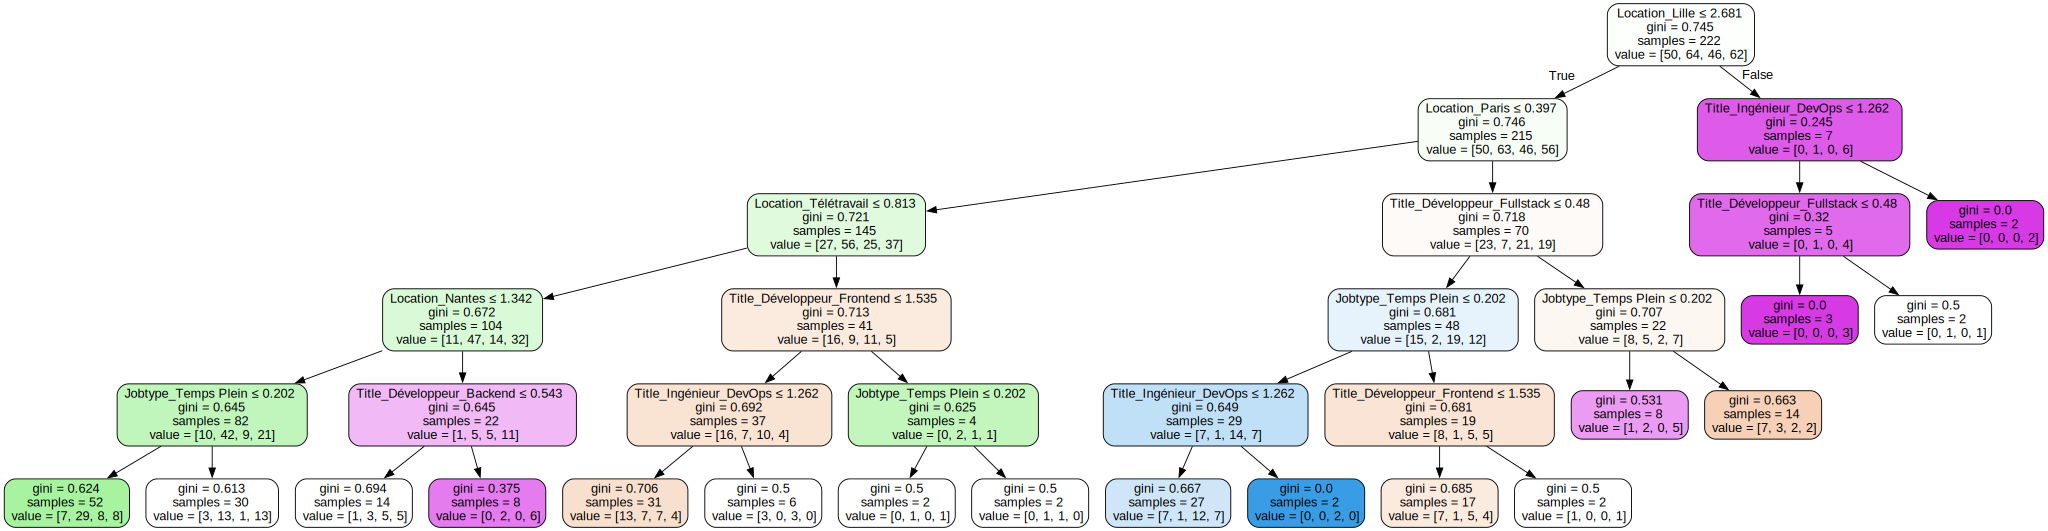

In [529]:
dotdata = export_graphviz(dtc_tuned,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=X2.columns,
                )

graph = graphviz.Source(dotdata) 

graph

In [498]:
dtc_tuned_cv_score = cross_val_score(dtc_tuned, X2_train, y2_train, cv=kf).mean()
dtc_tuned_cv_score 

0.45612648221343866

In [499]:
dtc_tuned.score(X2_test, y2_test)

0.2857142857142857

In [500]:
pd.DataFrame(zip(X2.columns,dtc_tuned.feature_importances_), columns = ['feature','importance']).sort_values(by='importance',ascending=False)

,feature,importance
18,Location_Paris,0.187767
26,Jobtype_Temps Plein,0.185006
24,Location_Télétravail,0.184527
10,Location_Lille,0.108657
16,Location_Nantes,0.093169
2,Title_Développeur_Fullstack,0.088171
3,Title_Ingénieur_DevOps,0.056700
0,Title_Développeur_Backend,0.049163
1,Title_Développeur_Frontend,0.046840
8,Location_Grenoble,0.000000


In [501]:
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve, classification_report

C:\Users\Samar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


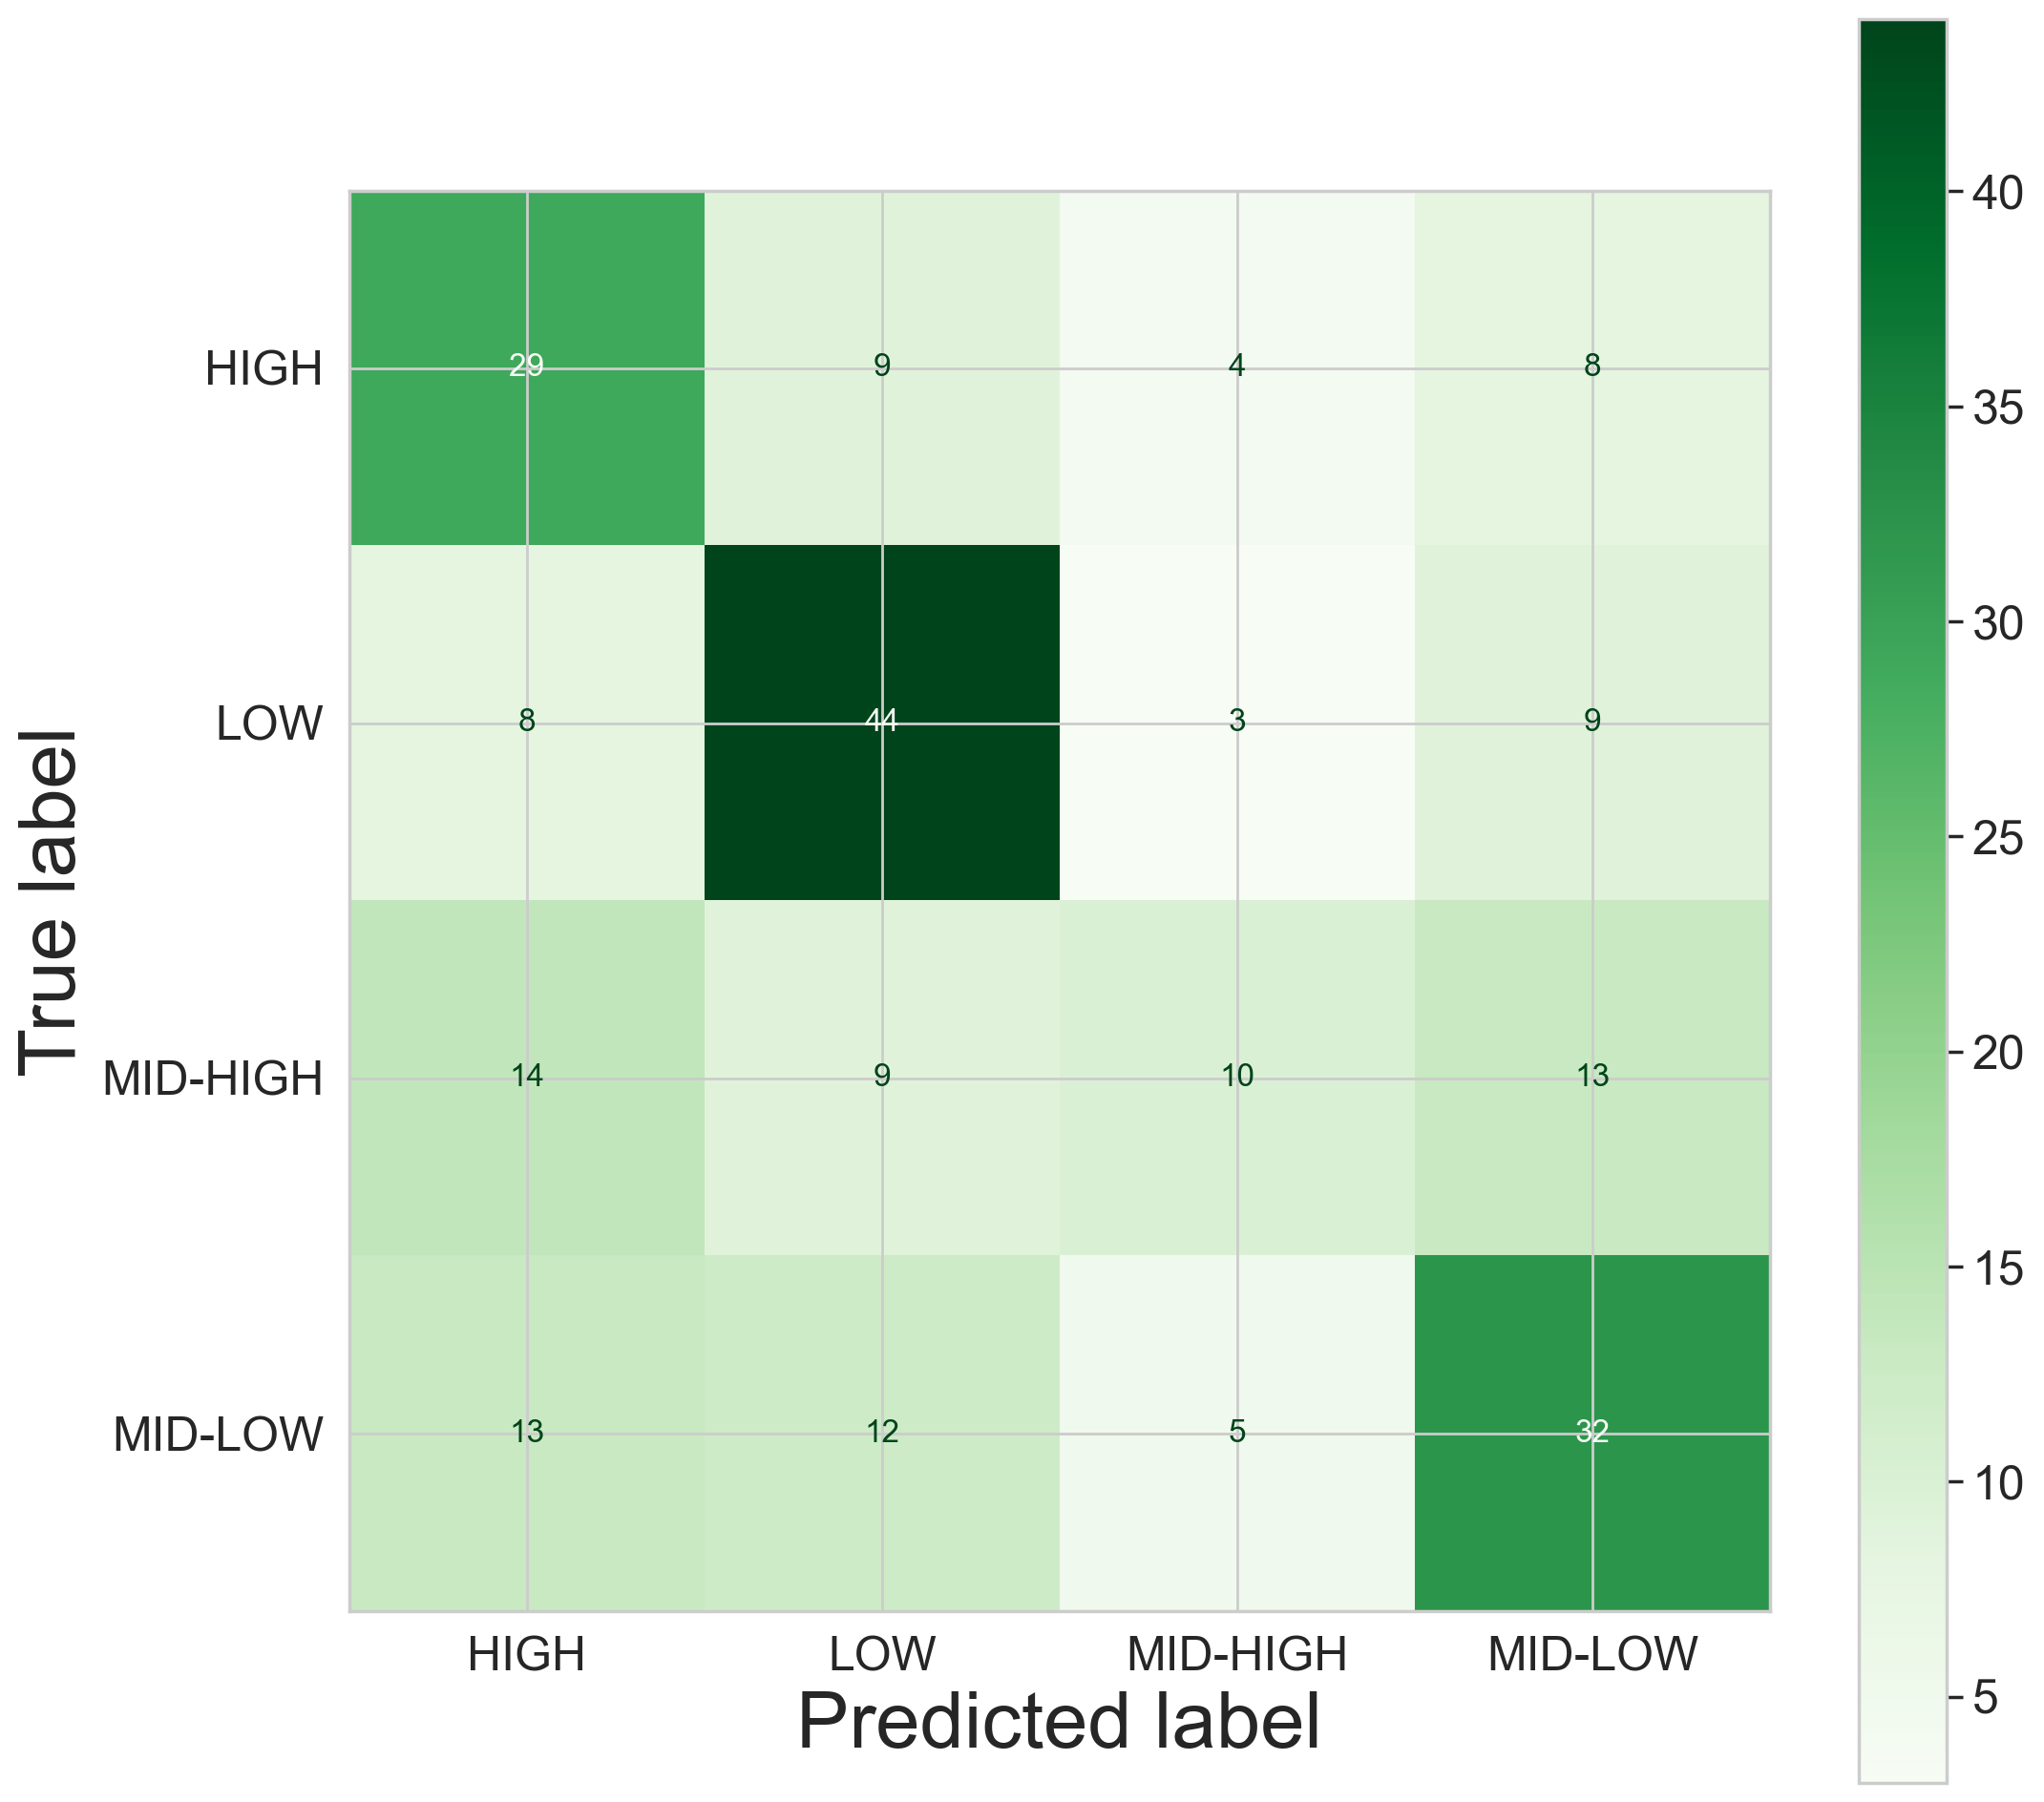

In [502]:
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(remod_lr, X2_train, y2_train, cmap='Greens', labels=remod_lr.classes_, values_format='.0f',ax=ax)
plt.show();

In [503]:
# La matrice de confusion ci-dessus est utile car elle permet de visualiser les performances exactes du modèle. 

# La matrice montre que le modèle prédit les MID-LOW salaires avec la plus grande fréquence. 
# Elle nous montre également que parmi ces prédictions, 33 sont correctes et 37 sont incorrectes.

# Voici le rapport de classification pour ce modèle :

In [504]:
predictions = remod_lr.predict(X2_train)
print(classification_report(y2_train, predictions, digits=4))

              precision    recall  f1-score   support

        HIGH     0.4531    0.5800    0.5088        50
         LOW     0.5946    0.6875    0.6377        64
    MID-HIGH     0.4545    0.2174    0.2941        46
     MID-LOW     0.5161    0.5161    0.5161        62

    accuracy                         0.5180       222
   macro avg     0.5046    0.5003    0.4892       222
weighted avg     0.5118    0.5180    0.5035       222



C:\Users\Samar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


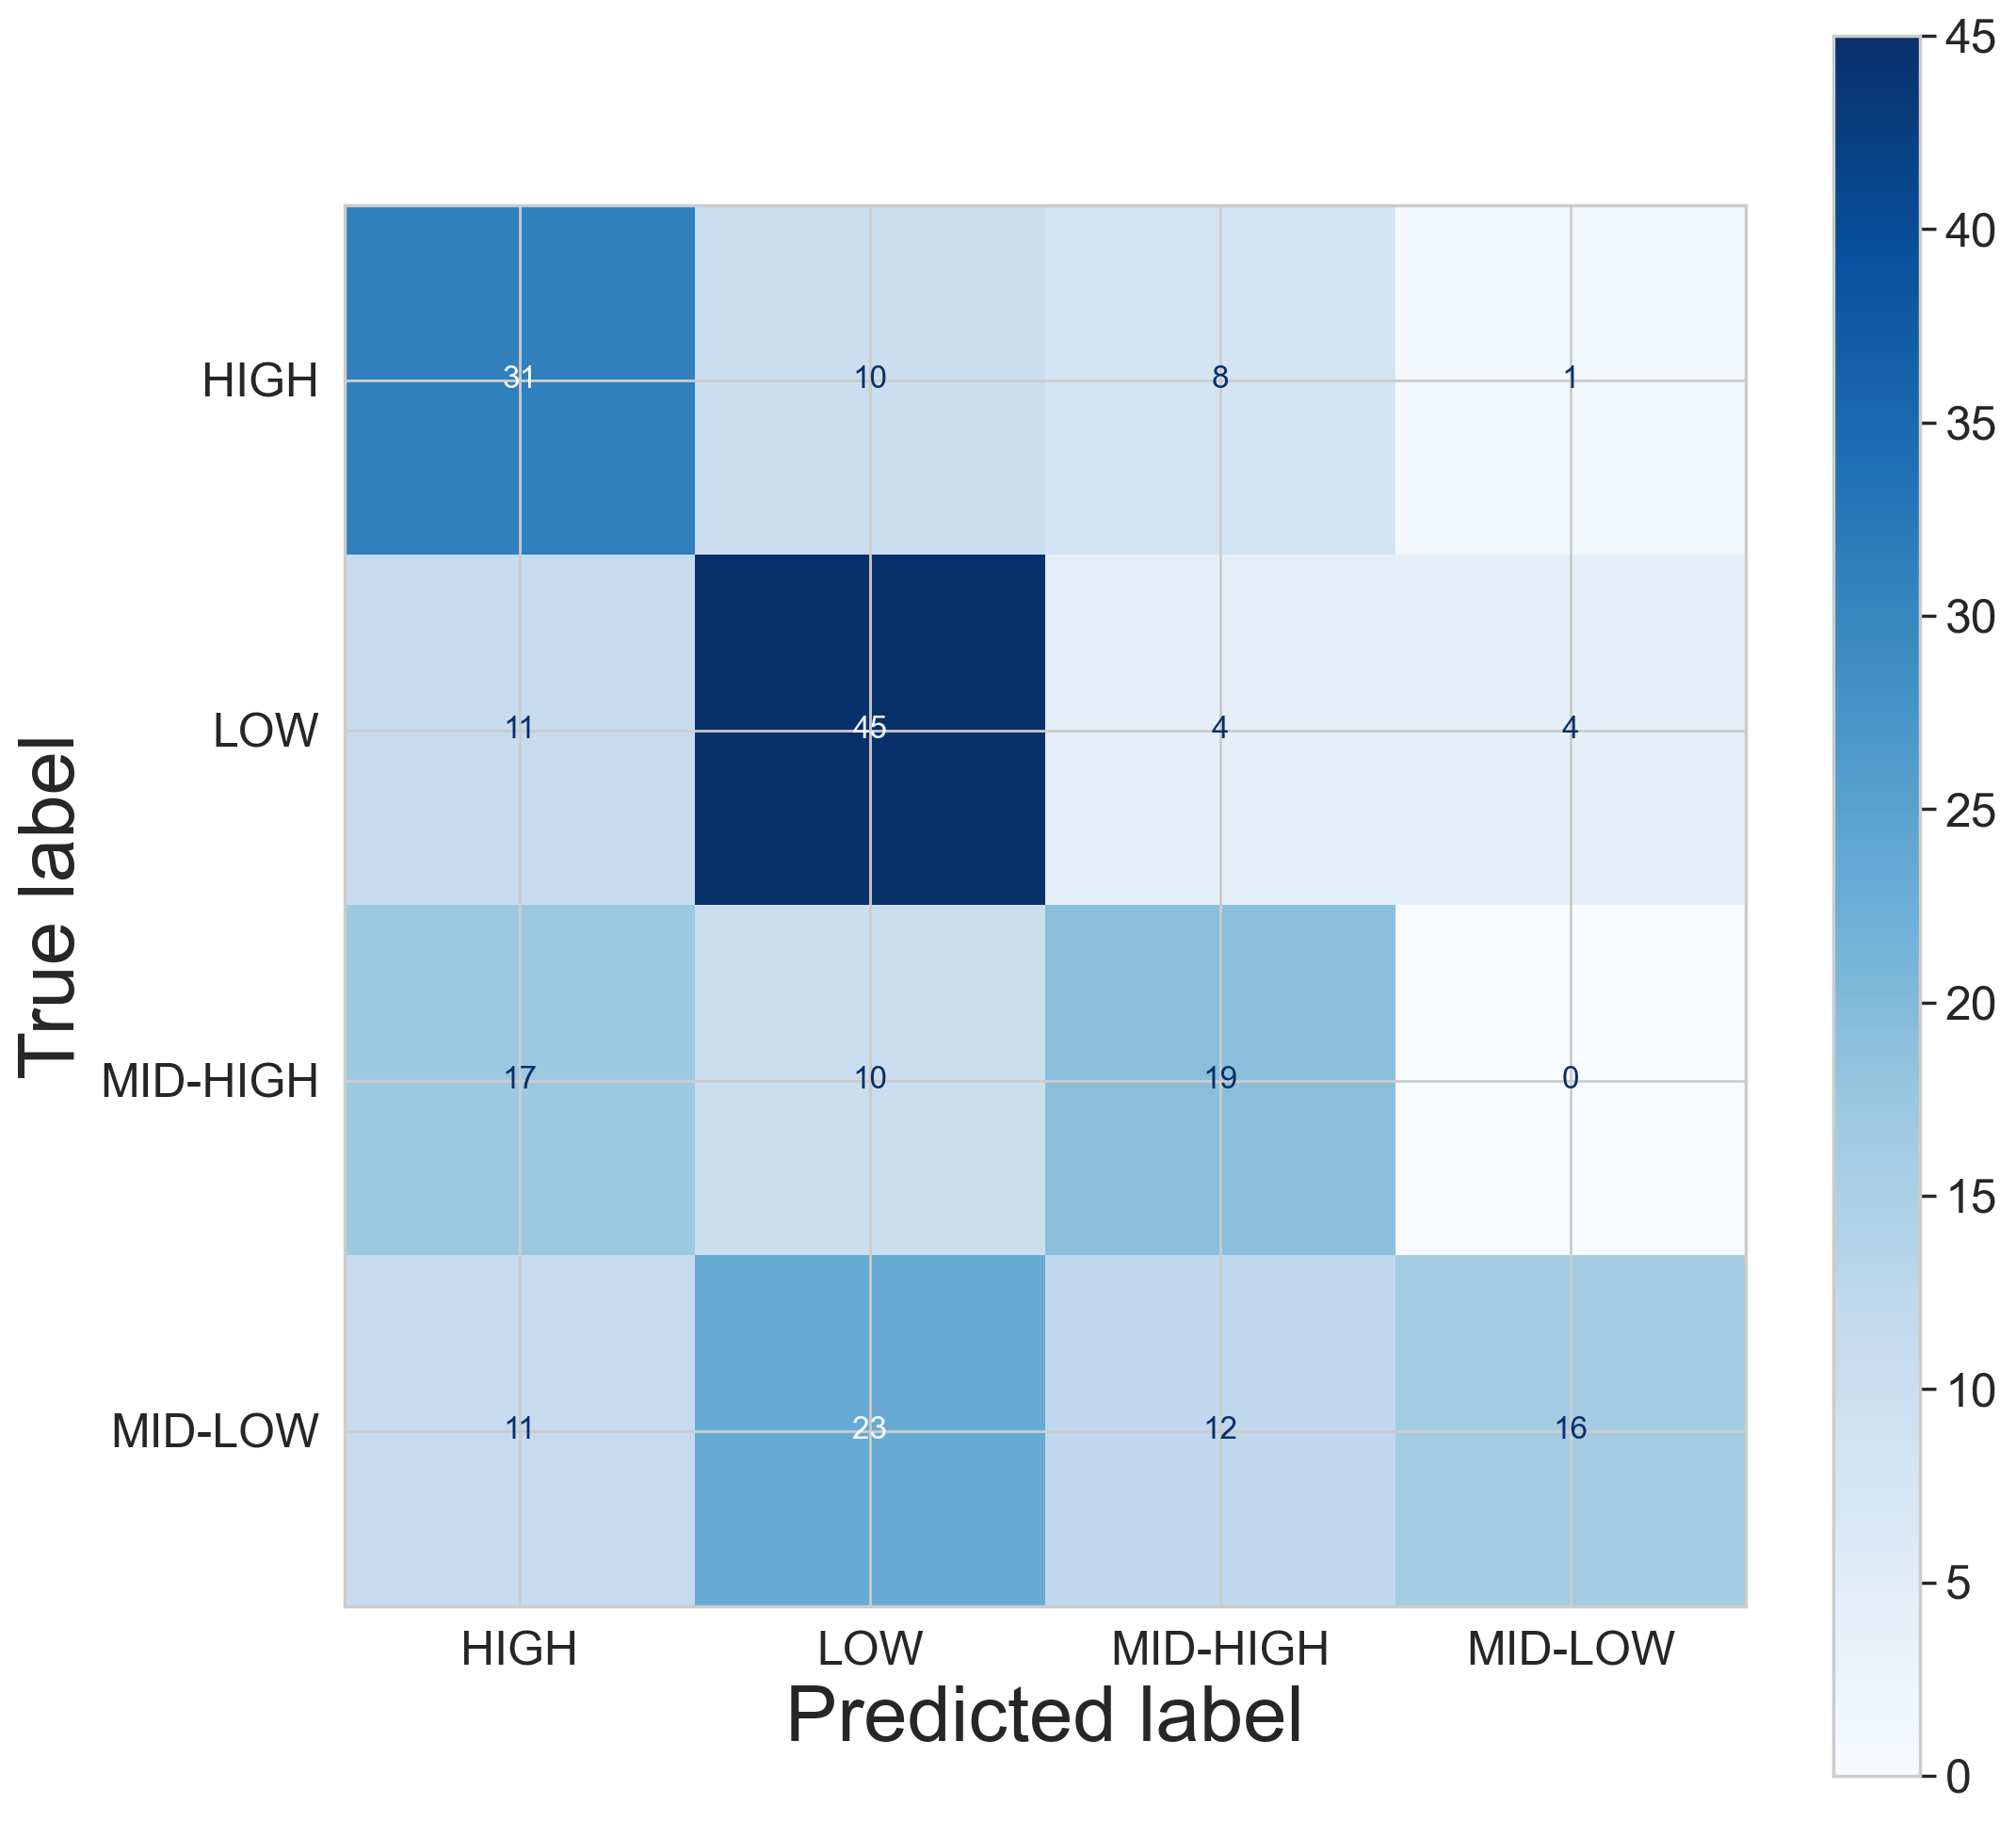

In [530]:
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(dtc_tuned, X2_train, y2_train, cmap='Blues', labels=dtc_tuned.classes_, values_format='.0f',ax=ax)
plt.show();

In [506]:
print(classification_report(y2_train, dtc_tuned.predict(X2_train), digits = 4))

              precision    recall  f1-score   support

        HIGH     0.4429    0.6200    0.5167        50
         LOW     0.5114    0.7031    0.5921        64
    MID-HIGH     0.4419    0.4130    0.4270        46
     MID-LOW     0.7619    0.2581    0.3855        62

    accuracy                         0.5000       222
   macro avg     0.5395    0.4986    0.4803       222
weighted avg     0.5515    0.5000    0.4832       222



In [507]:
# build the RFC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X2_train, y2_train, test_size=0.20,random_state=42)
rfc = RandomForestClassifier(n_estimators=9,random_state=42)
rfc.fit(Xr_train, yr_train)
from sklearn.metrics import accuracy_score
rfc_pred = rfc.predict(Xr_test)
acc = accuracy_score(yr_test, rfc_pred)
print("Accuracy Score:", acc.round(3))

Accuracy Score: 0.333


C:\Users\Samar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


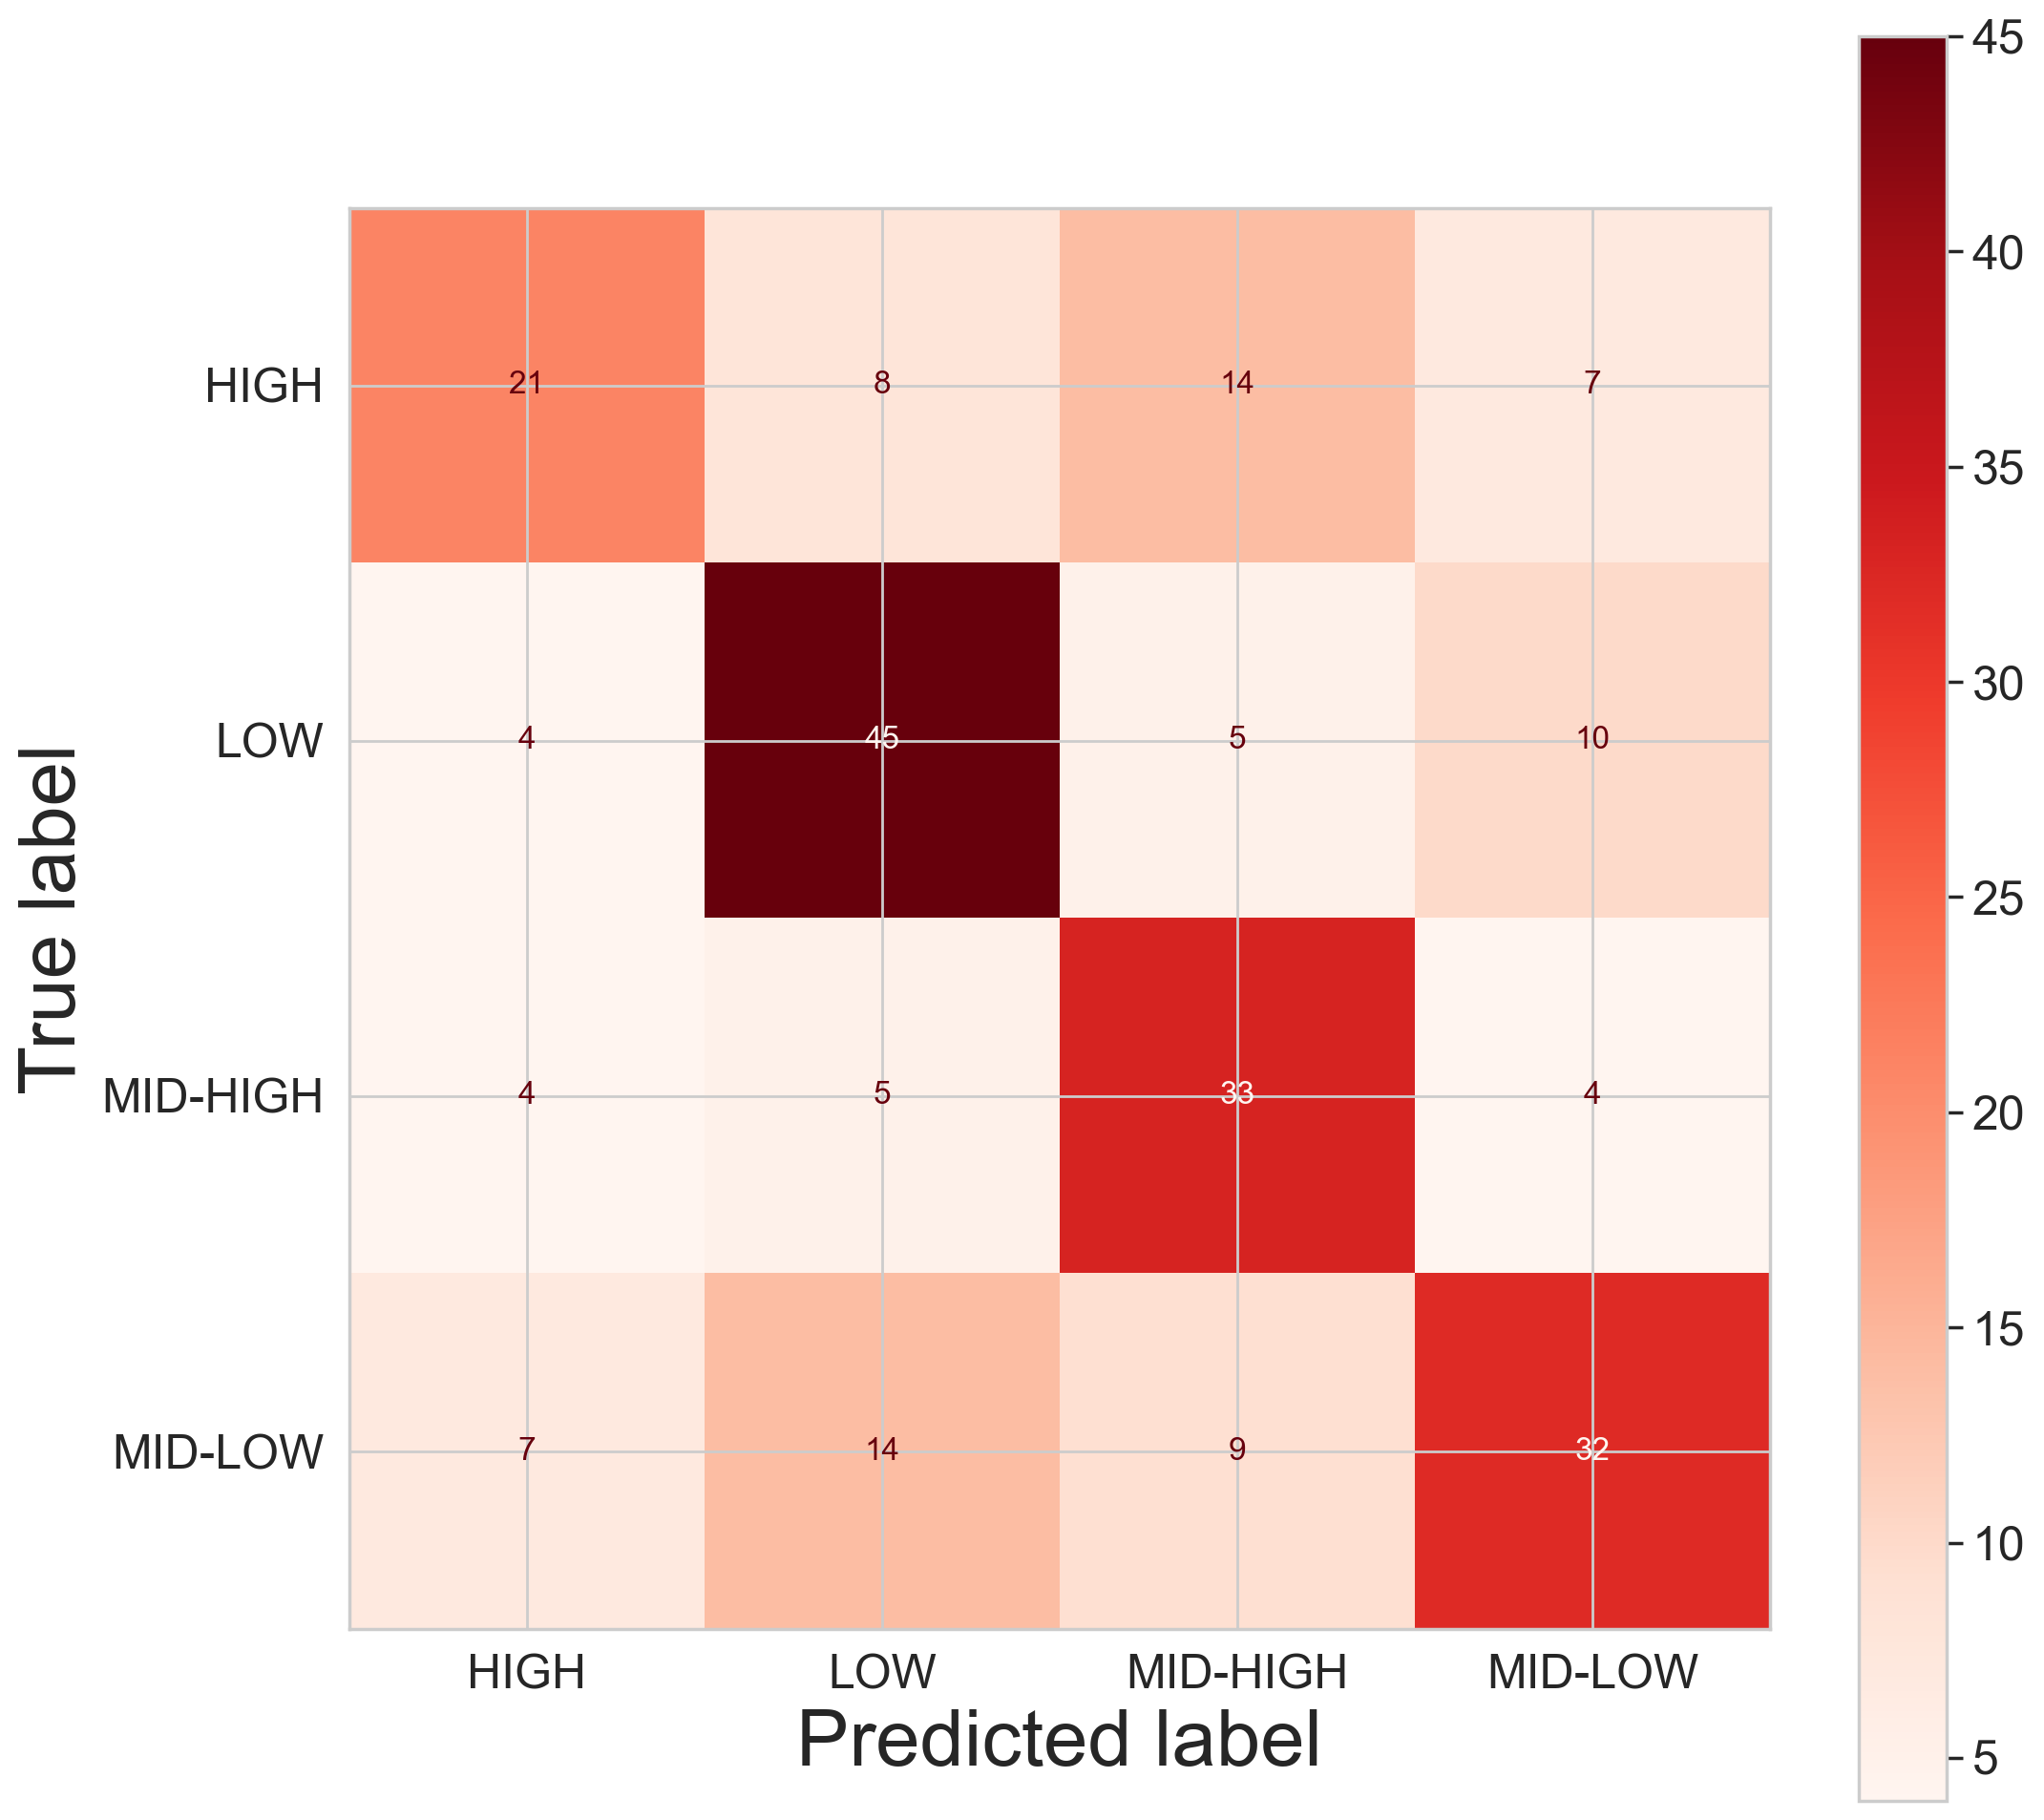

In [531]:
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(rfc, X2_train, y2_train, cmap='Reds', labels=rfc.classes_, values_format='.0f',ax=ax)
plt.show();

In [509]:
print(classification_report(y2_train, rfc.predict(X2_train), digits = 4))

# Precision ( Vrais positifs divisés par le total des positifs prédits)
# Recall (Vrais positifs divisés par le total des positifs réels)
# f1-score ( 2 * (precision * recall) / (precision + recall) )
# Support -  Nombre de valeurs vraies dans une telle classe

              precision    recall  f1-score   support

        HIGH     0.5833    0.4200    0.4884        50
         LOW     0.6250    0.7031    0.6618        64
    MID-HIGH     0.5410    0.7174    0.6168        46
     MID-LOW     0.6038    0.5161    0.5565        62

    accuracy                         0.5901       222
   macro avg     0.5883    0.5892    0.5809       222
weighted avg     0.5923    0.5901    0.5840       222



In [510]:


pd.DataFrame(zip(X2.columns,rfc.feature_importances_), columns = ['feature','importance']).sort_values(by='importance',ascending=False)

,feature,importance
26,Jobtype_Temps Plein,0.188940
2,Title_Développeur_Fullstack,0.098486
0,Title_Développeur_Backend,0.079136
18,Location_Paris,0.078969
1,Title_Développeur_Frontend,0.074336
24,Location_Télétravail,0.074139
7,Location_France,0.070579
3,Title_Ingénieur_DevOps,0.065502
16,Location_Nantes,0.065259
10,Location_Lille,0.036507
